# EDA_Project_Solution Part 1 - Data Cleaning

## Importing libraries and data

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import timedelta
import statistics as stats
%matplotlib inline
plt.style.use('ggplot')

# Pandas display options
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)


# Avoiding unneccessary warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [2]:
# Loading data
car=pd.read_json("scout_car.zip", lines=True)

In [3]:
# Checking data type of car
type(car)

pandas.core.frame.DataFrame

In [4]:
# Checking first five rows of the DataFrame
car.head()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system]","[Bluetooth, Hands-free equipment, On-board computer, Radio]","[Alloy wheels, Catalytic Converter, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]","[\n, Sicherheit:, , Deaktivierung für Beifahrer-Airbag, , ESC mit elektronischer Quersperre, , Tagfahrlicht, , Reifendruck-Kontrollanzeige, , Kopfairbag-System mit Seiten-Airbags vorn, , Sicherheitslenksäule, Assistenzsysteme:, , Berganfahrassistent, Komfort:, , Scheinwerferreinigung, , Xenon plus inklusive Scheinwerfer-Reinigungsanlage, , Scheinwerfer-Reinigungsanlage, , Einparkhilfe hinten, , Licht-/Regensensor, , Funkfernbedienung, , Elektrische Luftzusatzheizung, Interieur:...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-8-tfsi-sport-gasoline-red-b2547f8a-e83f-6237-e053-e250040a56df,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)], [4.7 l/100 km (country)]]",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, Hill Holder, Leather steering wheel, Lumbar support, Parking assist system sensors rear, Power windows, Start-stop system, Tinted windows]","[Bluetooth, Hands-free equipment, On-board computer, Radio, Sound system]","[Alloy wheels, Sport seats, Sport suspension, Voice Control]","[ABS, Central door lock, Central door lock with remote control, Daytime running lights, Driver-side airbag, Electronic stability control, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]","[\nLangstreckenfahrzeug daher die hohe Kilometerl

## Examinig dataset, dropping unnecessary columns

In [5]:
# Checking shape of DataFrame
car.shape

(15919, 54)

In [6]:
# Checking columns, data types, missing values
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   url                            object 
 1   make_model                     object 
 2   short_description              object 
 3   body_type                      object 
 4   price                          int64  
 5   vat                            object 
 6   km                             object 
 7   registration                   object 
 8   prev_owner                     object 
 9   kW                             float64
 10  hp                             object 
 11  Type                           object 
 12  Previous Owners                object 
 13  Next Inspection                object 
 14  Inspection new                 object 
 15  Warranty                       object 
 16  Full Service                   object 
 17  Non-smoking Vehicle            object 
 18  null  

In [7]:
# Checking missing value counts of each column
car.isnull().sum()

url                                  0
make_model                           0
short_description                   46
body_type                           60
price                                0
vat                               4513
km                                   0
registration                         0
prev_owner                        6828
kW                               15919
hp                                   0
Type                                 2
Previous Owners                   6640
Next Inspection                  12384
Inspection new                   11987
Warranty                          5420
Full Service                      7704
Non-smoking Vehicle               8742
null                                 0
Make                                 0
Model                                0
Offer Number                      3175
First Registration                1597
Body Color                         597
Paint Type                        5772
Body Color Original      

In [8]:
# Checking missing value counts of each column by percentage
print('Missing Value Percentage of Columns')
print('--------------------------')
round(car.isnull().sum()/car.shape[0]*100, 2).sort_values(ascending=False) 

Missing Value Percentage of Columns
--------------------------


kW                               100.00
Last Timing Belt Service Date     99.90
Electricity consumption           99.14
Available from                    98.29
Last Service Date                 96.44
Availability                      96.01
Other Fuel Types                  94.47
Next Inspection                   77.79
Inspection new                    75.30
Emission Label                    74.97
Model Code                        68.73
Non-smoking Vehicle               54.92
Country version                   52.35
Full Service                      48.39
Weight                            43.81
Drive chain                       43.08
prev_owner                        42.89
Previous Owners                   41.71
Paint Type                        36.26
Cylinders                         35.68
Warranty                          34.05
Gears                             29.60
vat                               28.35
Body Color Original               23.61
Upholstery                        23.37


In [9]:
# Dropping columns that contain high amount of missing values and has no impact on price
print('Shape of car DataFrame BEFORE dropping missing values:', car.shape)
drop_columns = ['kW','Last Timing Belt Service Date', 'Electricity consumption', 'Available from', 'Other Fuel Types',\
         'url', 'null', 'Body Color Original', 'Next Inspection', 'Inspection new','Last Service Date','Availability' ]
car.drop(drop_columns, axis=1, inplace=True)
print('Shape of car DataFrame AFTER dropping missing values:', car.shape)

Shape of car DataFrame BEFORE dropping missing values: (15919, 54)
Shape of car DataFrame AFTER dropping missing values: (15919, 42)


# String Operations

In [10]:
# Checking column names
car.columns

Index(['make_model', 'short_description', 'body_type', 'price', 'vat', 'km', 'registration', 'prev_owner', 'hp', 'Type', 'Previous Owners', 'Warranty', 'Full Service', 'Non-smoking Vehicle', 'Make', 'Model', 'Offer Number', 'First Registration', 'Body Color', 'Paint Type', 'Upholstery', 'Body', 'Nr. of Doors', 'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement', 'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n', '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n', 'description', 'Emission Label', 'Gears', 'Country version'], dtype='object')

## make_model, Make, Model

In [11]:
# Examining make_model column
print('Checking make_model column')
print('--------------------------')
print(car['make_model'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['make_model'].value_counts(),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['make_model'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['make_model'].dtype,'\n\n')

Checking make_model column
--------------------------
0               Audi A1
1               Audi A1
2               Audi A1
3               Audi A1
4               Audi A1
              ...      
15914    Renault Espace
15915    Renault Espace
15916    Renault Espace
15917    Renault Espace
15918    Renault Espace
Name: make_model, Length: 15919, dtype: object 


Number of each values
--------------------------
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64 


Number of missing values
--------------------------
0 


Data type
--------------------------
object 




In [12]:
# Examining Make column
print('Checking Make column')
print('--------------------------')
print(car['Make'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Make'].value_counts(),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Make'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Make'].dtype,'\n\n')

Checking Make column
--------------------------
0           \nAudi\n
1           \nAudi\n
2           \nAudi\n
3           \nAudi\n
4           \nAudi\n
            ...     
15914    \nRenault\n
15915    \nRenault\n
15916    \nRenault\n
15917    \nRenault\n
15918    \nRenault\n
Name: Make, Length: 15919, dtype: object 


Number of each values
--------------------------
\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: Make, dtype: int64 


Number of missing values
--------------------------
0 


Data type
--------------------------
object 




In [13]:
# Examining Model column
print('Checking Model column')
print('--------------------------')
print(car['Model'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Model'].value_counts(),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Model'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Model'].dtype,'\n\n')

Checking Model column
--------------------------
0            [\n, A1, \n]
1            [\n, A1, \n]
2            [\n, A1, \n]
3            [\n, A1, \n]
4            [\n, A1, \n]
               ...       
15914    [\n, Espace, \n]
15915    [\n, Espace, \n]
15916    [\n, Espace, \n]
15917    [\n, Espace, \n]
15918    [\n, Espace, \n]
Name: Model, Length: 15919, dtype: object 


Number of each values
--------------------------
[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: Model, dtype: int64 


Number of missing values
--------------------------
0 


Data type
--------------------------
object 




In [14]:
# Extracting Make form make_mode column
car['make1']=car['make_model'].str.extract('(\w* )')
# Stripping from both sides in case any spaces left
car['make1'] = car['make1'].str.strip()
# Checking make
car['make1']

0           Audi
1           Audi
2           Audi
3           Audi
4           Audi
          ...   
15914    Renault
15915    Renault
15916    Renault
15917    Renault
15918    Renault
Name: make1, Length: 15919, dtype: object

In [15]:
# Extracting model form make_mode column
car['model1']=car['make_model'].str.extract('( \w*)')
car['model1'] = car['model1'].str.strip()
# Checking model
car['model1']

0            A1
1            A1
2            A1
3            A1
4            A1
          ...  
15914    Espace
15915    Espace
15916    Espace
15917    Espace
15918    Espace
Name: model1, Length: 15919, dtype: object

## short_description

In [16]:
# Examining short_description column
print('Checking short_description column')
print('--------------------------')
print(car['short_description'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['short_description'].value_counts(),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['short_description'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['short_description'].dtype,'\n\n')

Checking short_description column
--------------------------
0               Sportback 1.4 TDI S-tronic Xenon Navi Klima
1                                            1.8 TFSI sport
2        Sportback 1.6 TDI S tronic Einparkhilfe plus+music
3                                   1.4 TDi Design S tronic
4        Sportback 1.4 TDI S-Tronic S-Line Ext. admired, Xe
                                ...                        
15914                 Blue dCi 200CV EDC Executive 4Control
15915                   TCe 225 EDC GPF LIM Deluxe Pano,RFK
15916    Blue dCi 200 EDC Initiale Paris Leder LED Navi Key
15917    Blue dCi 200CV EDC Business , NUOVA DA IMMATRICOLA
15918           INITIALE PARIS TCe 225 EDC GPF NAVI SHZ AUX
Name: short_description, Length: 15919, dtype: object 


Number of each values
--------------------------
SPB 1.6 TDI 116 CV S tronic Sport                   64
1.4 66kW (90CV) Selective                           40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH               38
SPB 30 T

In [17]:
# Cleaning short_description column
# Converting into string, to be sure to apply string operatins
car['short_description1'] = car['short_description'].astype('str')

# Extracting info from column, will be used to fill displacement missing values
car['short_description1_displ'] = car['short_description1'].str.extract(('(\d\.\d|\d\,\d)'), expand=True)
car['short_description1_displ']= car['short_description1_displ'].str.replace(',','.')
car['short_description1_displ']= car['short_description1_displ'].str.replace(' ','.').astype(float)

In [18]:
# Examining short_description1_displ column after cleaning
print('Checking short_description1_displ column')
print('--------------------------')
print(car['short_description1_displ'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['short_description1_displ'].value_counts(),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['short_description1_displ'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['short_description1_displ'].dtype,'\n\n')

Checking short_description1_displ column
--------------------------
0        1.4
1        1.8
2        1.6
3        1.4
4        1.4
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918    NaN
Name: short_description1_displ, Length: 15919, dtype: float64 


Number of each values
--------------------------
1.6    4204
1.4    2712
1.0    1479
1.2    1023
2.0     935
1.5     934
1.3     135
1.8      60
0.9      53
2.5      21
4.0      12
5.7       9
4.3       9
1.1       3
5.0       3
1.9       3
1.7       3
8.5       2
9.1       2
6.0       2
0.8       2
3.0       2
3.9       2
9.8       2
0.3       1
7.9       1
2.8       1
2.2       1
8.4       1
5.6       1
0.0       1
2.3       1
5.3       1
0.6       1
9.6       1
8.8       1
8.9       1
5.5       1
4.5       1
4.6       1
5.1       1
7.8       1
6.1       1
7.3       1
0.2       1
0.7       1
4.2       1
9.9       1
Name: short_description1_displ, dtype: int64 


Number of missing values
--------------------------

## body_type

In [19]:
# Examining body_type column
print('Checking body_type column')
print('--------------------------')
print(car['body_type'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['body_type'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['body_type'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['body_type'].dtype,'\n\n')

Checking body_type column
--------------------------
0        Sedans
1        Sedans
2        Sedans
3        Sedans
4        Sedans
          ...  
15914       Van
15915       Van
15916       Van
15917       Van
15918       Van
Name: body_type, Length: 15919, dtype: object 


Number of each values
--------------------------
Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64 


Number of missing values
--------------------------
60 


Data type
--------------------------
object 




## Body

In [20]:
# Examining Body column
print('Checking Body column')
print('--------------------------')
print(car['Body'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Body'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Body'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Body'].dtype,'\n\n')

Checking Body column
--------------------------
0        [\n, Sedans, \n]
1        [\n, Sedans, \n]
2        [\n, Sedans, \n]
3        [\n, Sedans, \n]
4        [\n, Sedans, \n]
               ...       
15914       [\n, Van, \n]
15915       [\n, Van, \n]
15916       [\n, Van, \n]
15917       [\n, Van, \n]
15918       [\n, Van, \n]
Name: Body, Length: 15919, dtype: object 


Number of each values
--------------------------
[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
NaN                          60
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: Body, dtype: int64 


Number of missing values
--------------------------
60 


Data type
--------------------------
object 




In [21]:
# Comparing body_type and Body columns
car[['body_type','Body']]

,body_type,Body
0,Sedans,"[\n, Sedans, \n]"
1,Sedans,"[\n, Sedans, \n]"
2,Sedans,"[\n, Sedans, \n]"
3,Sedans,"[\n, Sedans, \n]"
4,Sedans,"[\n, Sedans, \n]"
...,...,...
15914,Van,"[\n, Van, \n]"
15915,Van,"[\n, Van, \n]"
15916,Van,"[\n, Van, \n]"
15917,Van,"[\n, Van, \n]"


In [22]:
# Checking if body_type and Body missing values overlap
(car['body_type'].isnull()==car['Body'].isnull()).mean()

1.0

## price

In [23]:
# Examining price column
print('Checking price column')
print('--------------------------')
print(car['price'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['price'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['price'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['price'].dtype,'\n\n')

Checking price column
--------------------------
0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
15914    39950
15915    39885
15916    39875
15917    39700
15918    40999
Name: price, Length: 15919, dtype: int64 


Number of each values
--------------------------
14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
48490      1
36180      1
40745      1
9545       1
34815      1
Name: price, Length: 2956, dtype: int64 


Number of missing values
--------------------------
0 


Data type
--------------------------
int64 




count    15919.000000
mean     18019.896727
std       7386.169409
min         13.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64


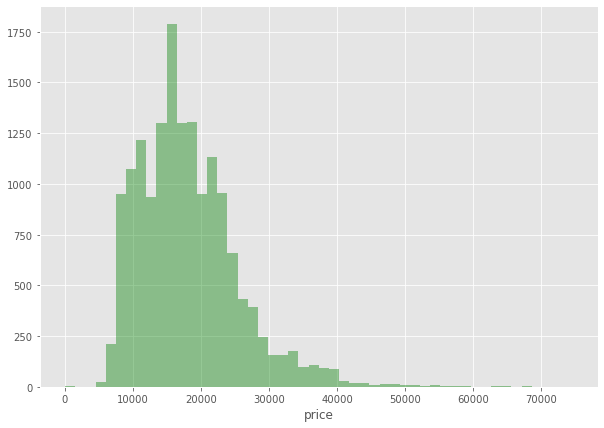

In [24]:
# Distrubution Plot of price
print(car.price.describe())
plt.figure(figsize=(10, 7))
sns.distplot(car.price, color='g', bins=50, hist_kws={'alpha': 0.4}, kde=False);

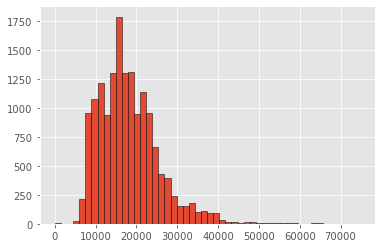

In [25]:
# Histogram of price
plt.hist(car.price, bins=50, edgecolor="black");

## Model Code

In [26]:
# Examining Model Code column
print('Checking Model Code column')
print('--------------------------')
print(car['Model Code'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Model Code'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Model Code'].isnull().sum(),'\n\n')

Checking Model Code column
--------------------------
0        [\n0588/BDF\n]
1        [\n0588/BCY\n]
2                   NaN
3                   NaN
4        [\n0588/BDF\n]
              ...      
15914               NaN
15915    [\n0000/000\n]
15916               NaN
15917               NaN
15918    [\n3333/BHJ\n]
Name: Model Code, Length: 15919, dtype: object 


Number of each values
--------------------------
NaN               10941
[\n0035/BCB\n]      268
[\n0588/BNO\n]      245
[\n0588/BDB\n]      206
[\n0588/BHX\n]      188
                  ...  
[\n1844/AEN\n]        1
[\n0588/AVR\n]        1
[\n0035/AFF\n]        1
[\n1844/AFM\n]        1
[\n0035/AVN\n]        1
Name: Model Code, Length: 233, dtype: int64 


Number of missing values
--------------------------
10941 




## vat

In [27]:
# Examining vat column
print('Checking vat column')
print('--------------------------')
print(car['vat'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['vat'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['vat'].isnull().sum(),'\n\n')

Checking vat column
--------------------------
0          VAT deductible
1        Price negotiable
2          VAT deductible
3                    None
4                    None
               ...       
15914      VAT deductible
15915      VAT deductible
15916      VAT deductible
15917      VAT deductible
15918      VAT deductible
Name: vat, Length: 15919, dtype: object 


Number of each values
--------------------------
VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64 


Number of missing values
--------------------------
4513 




In [28]:
# Checking price average by model and vat
car.groupby(['model1','vat'])['price'].mean()

model1    vat             
A1        Price negotiable    16276.432099
          VAT deductible      19630.430101
A2        VAT deductible      28200.000000
A3        Price negotiable    20653.069307
          VAT deductible      21218.886827
Astra     Price negotiable    12610.644444
          VAT deductible      16515.375821
Clio      Price negotiable    11857.810811
          VAT deductible      12199.228659
Corsa     Price negotiable     9351.853659
          VAT deductible      11699.166148
Duster    VAT deductible      14611.000000
Espace    Price negotiable    24959.647059
          VAT deductible      32070.388985
Insignia  Price negotiable    15520.500000
          VAT deductible      22137.912626
Name: price, dtype: float64

In [29]:
car.groupby('model1')['vat'].value_counts(normalize=True)

model1    vat             
A1        VAT deductible      0.956334
          Price negotiable    0.043666
A2        VAT deductible      1.000000
A3        VAT deductible      0.956277
          Price negotiable    0.043723
Astra     VAT deductible      0.975974
          Price negotiable    0.024026
Clio      VAT deductible      0.930057
          Price negotiable    0.069943
Corsa     VAT deductible      0.975121
          Price negotiable    0.024879
Duster    VAT deductible      1.000000
Espace    VAT deductible      0.944715
          Price negotiable    0.055285
Insignia  VAT deductible      0.975369
          Price negotiable    0.024631
Name: vat, dtype: float64

In [30]:
# Number of models where vat is missing
car[car['vat'].isnull()]['model1'].value_counts()

A3          787
Clio        781
A1          759
Astra       653
Corsa       571
Insignia    568
Espace      376
Duster       18
Name: model1, dtype: int64

## km

In [31]:
# Examining km column
print('Checking km column')
print('--------------------------')
print(car['km'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['km'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['km'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['km'].dtype,'\n\n')

Checking km column
--------------------------
0        56,013 km
1        80,000 km
2        83,450 km
3        73,000 km
4        16,200 km
           ...    
15914         - km
15915     9,900 km
15916        15 km
15917        10 km
15918         - km
Name: km, Length: 15919, dtype: object 


Number of each values
--------------------------
10 km         1045
- km          1024
1 km           367
5 km           170
50 km          148
              ... 
22,633 km        1
5,907 km         1
158,300 km       1
51,160 km        1
18,174 km        1
Name: km, Length: 6690, dtype: int64 


Number of missing values
--------------------------
0 


Data type
--------------------------
object 




In [32]:
# Stripping all except numbers
car['km1'] = car.km.apply(lambda x: re.sub('\D',"",x))

# Converting data type to numeric
car['km1'] = pd.to_numeric(car['km1'], errors='coerce')

In [33]:
# Checking km after cleaning
print('Checking km1 column')
print('--------------------------')
print(car['km1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['km1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['km1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['km1'].dtype,'\n\n')

Checking km1 column
--------------------------
0        56013.0
1        80000.0
2        83450.0
3        73000.0
4        16200.0
          ...   
15914        NaN
15915     9900.0
15916       15.0
15917       10.0
15918        NaN
Name: km1, Length: 15919, dtype: float64 


Number of each values
--------------------------
10.0       1045
NaN        1024
1.0         367
5.0         170
50.0        148
           ... 
8329.0        1
267.0         1
1060.0        1
73652.0       1
49320.0       1
Name: km1, Length: 6690, dtype: int64 


Number of missing values
--------------------------
1024 


Data type
--------------------------
float64 




## registration

In [34]:
# Examining registration column
print('Checking registration column')
print('--------------------------')
print(car['registration'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['registration'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['registration'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['registration'].dtype,'\n\n')

Checking registration column
--------------------------
0        01/2016
1        03/2017
2        02/2016
3        08/2016
4        05/2016
          ...   
15914        -/-
15915    01/2019
15916    03/2019
15917    06/2019
15918    01/2019
Name: registration, Length: 15919, dtype: object 


Number of each values
--------------------------
-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2016     141
09/2018     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103


In [35]:
# Assigning np.nan to -/- values
car["registration"][car["registration"]=="-/-"] = np.nan

# Converting data type into datetime
car['registration1'] = car["registration"].astype('datetime64')

In [36]:
# Examining registration1 column after cleaning
print('Checking registration1 column')
print('--------------------------')
print(car['registration1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['registration1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['registration1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['registration1'].dtype,'\n\n')

Checking registration1 column
--------------------------
0       2016-01-01
1       2017-03-01
2       2016-02-01
3       2016-08-01
4       2016-05-01
           ...    
15914          NaT
15915   2019-01-01
15916   2019-03-01
15917   2019-06-01
15918   2019-01-01
Name: registration1, Length: 15919, dtype: datetime64[ns] 


Number of each values
--------------------------
NaT           1597
2018-03-01     695
2019-02-01     585
2018-05-01     572
2019-03-01     543
2018-04-01     541
2019-01-01     541
2018-02-01     539
2016-03-01     536
2018-06-01     532
2016-04-01     532
2018-01-01     511
2019-04-01     506
2016-02-01     472
2017-03-01     471
2016-05-01     459
2016-06-01     452
2019-05-01     440
2017-06-01     409
2017-05-01     404
2018-07-01     396
2017-04-01     380
2016-01-01     376
2017-02-01     368
2017-01-01     306
2018-08-01     285
2019-06-01     224
2017-07-01     215
2017-11-01     180
2016-07-01     176
2016-10-01     160
2017-10-01     154
2017-09-01     1

## First Registration

In [37]:
# Examining First Registration column
print('Checking First Registration column')
print('--------------------------')
print(car['First Registration'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['First Registration'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['First Registration'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['First Registration'].dtype,'\n\n')

Checking First Registration column
--------------------------
0        [\n, 2016, \n]
1        [\n, 2017, \n]
2        [\n, 2016, \n]
3        [\n, 2016, \n]
4        [\n, 2016, \n]
              ...      
15914               NaN
15915    [\n, 2019, \n]
15916    [\n, 2019, \n]
15917    [\n, 2019, \n]
15918    [\n, 2019, \n]
Name: First Registration, Length: 15919, dtype: object 


Number of each values
--------------------------
[\n, 2018, \n]    4522
[\n, 2016, \n]    3674
[\n, 2017, \n]    3273
[\n, 2019, \n]    2853
NaN               1597
Name: First Registration, dtype: int64 


Number of missing values
--------------------------
1597 


Data type
--------------------------
object 




In [38]:
# Checking if registration and First Registration missing values are overlapping
(car['registration1'].isnull() == car['First Registration'].isnull()).mean()

1.0

In [39]:
# A second check
car[car['First Registration'].isnull()]['registration1'].count()

0

## Creating a new column named "age1" using registration information, Feature Engineering

In [40]:
# car['age2'] for calculation date as December 2019
car['age2'] = date(2019,12,1)

# Assigning datetime data type
car['age2'] = car['age2'].astype('datetime64')

# Calculating age of each car by subtracting registration data from December 2019
car['age1'] = car['age2'] - car['registration1']

# Converting the result in year format
car['age1'] = car['age1'] / timedelta(days=365)

In [41]:
# Examining age column
print('Checking registration column')
print('--------------------------')
print(car['age1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['age1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['age1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['age1'].dtype,'\n\n')

Checking registration column
--------------------------
0        3.917808
1        2.753425
2        3.832877
3        3.334247
4        3.586301
           ...   
15914         NaN
15915    0.915068
15916    0.753425
15917    0.501370
15918    0.915068
Name: age1, Length: 15919, dtype: float64 


Number of each values
--------------------------
NaN         1597
1.753425     695
0.830137     585
1.586301     572
0.753425     543
0.915068     541
1.668493     541
1.830137     539
3.753425     536
3.668493     532
1.501370     532
1.915068     511
0.668493     506
3.832877     472
2.753425     471
3.586301     459
3.501370     452
0.586301     440
2.501370     409
2.586301     404
1.419178     396
2.668493     380
3.917808     376
2.830137     368
2.915068     306
1.334247     285
0.501370     224
2.419178     215
2.082192     180
3.419178     176
3.167123     160
2.167123     154
2.249315     149
3.082192     142
3.249315     141
1.249315     141
3.000000     134
2.000000     123
2.3342

In [42]:
# Checking correlation of age,km and price
car.corr(method ='pearson')

,price,short_description1_displ,km1,age1
price,1.000000,0.256708,-0.387821,-0.445827
short_description1_displ,0.256708,1.000000,0.196296,0.074270
km1,-0.387821,0.196296,1.000000,0.749984
age1,-0.445827,0.074270,0.749984,1.000000


## prev_owner

In [43]:
# Examining prev_owner column
print('Checking prev_owner column')
print('--------------------------')
print(car['prev_owner'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['prev_owner'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['prev_owner'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['prev_owner'].dtype,'\n\n')

Checking prev_owner column
--------------------------
0        2 previous owners
1                     None
2         1 previous owner
3         1 previous owner
4         1 previous owner
               ...        
15914                 None
15915     1 previous owner
15916     1 previous owner
15917                 None
15918     1 previous owner
Name: prev_owner, Length: 15919, dtype: object 


Number of each values
--------------------------
1 previous owner     8294
NaN                  6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64 


Number of missing values
--------------------------
6828 


Data type
--------------------------
object 




In [44]:
# Cleaning prev_owner column
# Converting into string, to be sure to apply string operatins
car['prev_owner1'] = car['prev_owner'].astype(str)

# Extracting info from column
car['prev_owner1'] = car['prev_owner1'].str.extract('(\d)', expand=False)

# Changing data type into numeric, assigning empty cells as np.nan
car['prev_owner1'] = pd.to_numeric(car['prev_owner1'], errors='coerce')

In [45]:
# Examining prev_owner column after cleaning
print('Checking prev_owner1 column')
print('--------------------------')
print(car['prev_owner1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['prev_owner1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['prev_owner1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['prev_owner1'].dtype,'\n\n')

Checking prev_owner1 column
--------------------------
0        2.0
1        NaN
2        1.0
3        1.0
4        1.0
        ... 
15914    NaN
15915    1.0
15916    1.0
15917    NaN
15918    1.0
Name: prev_owner1, Length: 15919, dtype: float64 


Number of each values
--------------------------
1.0    8294
NaN    6828
2.0     778
3.0      17
4.0       2
Name: prev_owner1, dtype: int64 


Number of missing values
--------------------------
6828 


Data type
--------------------------
float64 




## Previous Owners

In [46]:
# Examining Previous Owners column
print('Checking Previous Owners column')
print('--------------------------')
print(car['Previous Owners'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Previous Owners'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Previous Owners'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Previous Owners'].dtype,'\n\n')

Checking Previous Owners column
--------------------------
0                                                                                            \n2\n
1                                                                                              NaN
2                                                                                            \n1\n
3                                                                                            \n1\n
4                                                                                            \n1\n
                                                   ...                                            
15914                                                                                          NaN
15915    [\n1\n, \n, 7.4 l/100 km (comb), \n, 9.2 l/100 km (city), \n, 6.3 l/100 km (country), \n]
15916                                                             [\n1\n, \n139 g CO2/km (comb)\n]
15917                                             

In [47]:
# Some checks to see if prev_owner missing values would be filled with Previous Owners values
car[car['prev_owner'].isnull()]['Previous Owners'].isnull().sum()

6640

In [48]:
car[(car['prev_owner'].isnull()) & (car['Previous Owners'].notnull())].count()[0]

188

In [49]:
car[(car['prev_owner'].notnull()) & (car['Previous Owners'].isnull())].count()[0]

0

In [50]:
car[(car['prev_owner'].isnull())& (car['Previous Owners'].notnull())]['Previous Owners'].value_counts()

\n0\n                                                                                        163
[\n0\n, \n139 g CO2/km (comb)\n]                                                               4
[\n0\n, \n114 g CO2/km (comb)\n]                                                               3
[\n0\n, \n0 kWh/100 km (comb)\n]                                                               2
[\n0\n, \n, 5.4 l/100 km (comb), \n, 7.1 l/100 km (city), \n, 4.4 l/100 km (country), \n]      2
[\n0\n, \n136 g CO2/km (comb)\n]                                                               2
[\n0\n, \n120 g CO2/km (comb)\n]                                                               2
[\n0\n, \n126 g CO2/km (comb)\n]                                                               2
[\n0\n, \n, 4.6 l/100 km (comb), \n, 5.8 l/100 km (city), \n, 3.9 l/100 km (country), \n]      1
[\n0\n, \n106 g CO2/km (comb)\n]                                                               1
[\n0\n, \n107 g CO2/km (comb)\

## hp

In [51]:
# Examining hp column
print('Checking hp column')
print('--------------------------')
print(car['hp'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['hp'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['hp'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['hp'].dtype,'\n\n')

Checking hp column
--------------------------
0         66 kW
1        141 kW
2         85 kW
3         66 kW
4         66 kW
          ...  
15914    147 kW
15915    165 kW
15916    146 kW
15917    147 kW
15918    165 kW
Name: hp, Length: 15919, dtype: object 


Number of each values
--------------------------
85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
          ... 
195 kW       1
132 kW       1
137 kW       1
163 kW       1
123 kW       1
Name: hp, Length: 81, dtype: int64 


Number of missing values
--------------------------
0 


Data type
--------------------------
object 




In [52]:
# # Stripping all, except numbers
car['hp1'] = car.hp.apply(lambda x: re.sub('\D',"",x))

# Converting data type to numeric
car['hp1'] = pd.to_numeric(car['hp1'], errors='coerce')

In [53]:
# Examining hp column after cleaning
print('Checking hp column')
print('--------------------------')
print(car['hp1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['hp1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['hp1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['hp1'].dtype,'\n\n')

Checking hp column
--------------------------
0         66.0
1        141.0
2         85.0
3         66.0
4         66.0
         ...  
15914    147.0
15915    165.0
15916    146.0
15917    147.0
15918    165.0
Name: hp1, Length: 15919, dtype: float64 


Number of each values
--------------------------
85.0     2542
66.0     2122
81.0     1402
100.0    1308
110.0    1112
         ... 
75.0        1
115.0       1
137.0       1
132.0       1
84.0        1
Name: hp1, Length: 81, dtype: int64 


Number of missing values
--------------------------
88 


Data type
--------------------------
float64 




## Type

In [54]:
# Examining Type column
print('Checking Type column')
print('--------------------------')
print(car['Type'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Type'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Type'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Type'].dtype,'\n\n')

Checking Type column
--------------------------
0                          [, Used, , Diesel (Particulate Filter)]
1                                             [, Used, , Gasoline]
2                          [, Used, , Diesel (Particulate Filter)]
3                          [, Used, , Diesel (Particulate Filter)]
4                          [, Used, , Diesel (Particulate Filter)]
                                   ...                            
15914                       [, New, , Diesel (Particulate Filter)]
15915    [, Used, , Super 95 / Super Plus 98 (Particulate Filter)]
15916                                 [, Pre-registered, , Diesel]
15917                                 [, Pre-registered, , Diesel]
15918                                [, Demonstration, , Super 95]
Name: Type, Length: 15919, dtype: object 


Number of each values
--------------------------
[, Used, , Diesel (Particulate Filter)]                                                                                  3

In [55]:
# Assigning string data type
car['Type1']=car['Type'].astype(str)

# Extracting required info from column
car['Type1']=car['Type1'].str.extract("(Used|New|Pre-registered|Employee's car|Demonstration)")

In [56]:
# Examining Type column after cleaning
print('Checking Type column')
print('--------------------------')
print(car['Type1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Type1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Type1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Type1'].dtype,'\n\n')

Checking Type column
--------------------------
0                  Used
1                  Used
2                  Used
3                  Used
4                  Used
              ...      
15914               New
15915              Used
15916    Pre-registered
15917    Pre-registered
15918     Demonstration
Name: Type1, Length: 15919, dtype: object 


Number of each values
--------------------------
Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: Type1, dtype: int64 


Number of missing values
--------------------------
2 


Data type
--------------------------
object 




## Warranty

In [57]:
# Examining Warranty column
print('Checking Warranty column')
print('--------------------------')
print(car['Warranty'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Warranty'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Warranty'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Warranty'].dtype,'\n\n')

Checking Warranty column
--------------------------
0                 [\n, \n, \n4 (Green)\n]
1                                     NaN
2        [\n, \n, \n99 g CO2/km (comb)\n]
3                                     NaN
4                    [\n, \n, \nEuro 6\n]
                       ...               
15914                       \n24 months\n
15915                [\n, \n, \nEuro 6\n]
15916             [\n, \n, \n4 (Green)\n]
15917                                  \n
15918                                 NaN
Name: Warranty, Length: 15919, dtype: object 


Number of each values
--------------------------
NaN                                         5420
[\n, \n, \nEuro 6\n]                        1868
\n12 months\n                               1177
\n                                           979
\n24 months\n                                566
                                            ... 
[\n36 months\n, \n136 g CO2/km (comb)\n]       1
[\n3 months\n, \n116 g CO2/km (comb)\n]       

In [58]:
# Assigning string data type
car['Warranty1'] = car['Warranty'].astype(str)

# Extracting required info from column
car['Warranty1'] = car['Warranty1'].str.extract('(\d\d|\d).mo')

# Assigning float data type
car['Warranty1'] = car['Warranty1'].astype(float)

In [59]:
# Examining Warranty column after cleaning
print('Checking Warranty column')
print('--------------------------')
print(car['Warranty1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Warranty1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Warranty1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Warranty1'].dtype,'\n\n')

Checking Warranty column
--------------------------
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
15914    24.0
15915     NaN
15916     NaN
15917     NaN
15918     NaN
Name: Warranty1, Length: 15919, dtype: float64 


Number of each values
--------------------------
NaN     11066
12.0     2594
24.0     1118
60.0      401
36.0      279
48.0      149
6.0       125
72.0       59
3.0        33
23.0       11
18.0       10
20.0        7
25.0        6
2.0         5
26.0        4
50.0        4
16.0        4
1.0         3
4.0         3
34.0        3
19.0        3
13.0        3
11.0        2
21.0        2
14.0        2
17.0        2
45.0        2
46.0        2
9.0         2
22.0        2
28.0        2
56.0        1
47.0        1
10.0        1
8.0         1
7.0         1
40.0        1
33.0        1
65.0        1
15.0        1
30.0        1
49.0        1
Name: Warranty1, dtype: int64 


Number of missing values
--------------------------
11066 


Data type
---

In [60]:
# Checking Warranty missing values for Types
car[car['Warranty1'].isnull()]['Type1'].value_counts()

Used              7374
New               1321
Pre-registered    1004
Employee's car     751
Demonstration      614
Name: Type1, dtype: int64

## Full Service

In [61]:
# Examining Full Service column after cleaning
print('Checking Full Service column')
print('--------------------------')
print(car['Full Service'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Full Service'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Full Service'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Full Service'].dtype,'\n\n')

Checking Full Service column
--------------------------
0                                [\n, \n]
1                                     NaN
2                                     NaN
3        [\n, \n, \n99 g CO2/km (comb)\n]
4                 [\n, \n, \n4 (Green)\n]
                       ...               
15914                                 NaN
15915                                 NaN
15916                            [\n, \n]
15917                                 NaN
15918                                 NaN
Name: Full Service, Length: 15919, dtype: object 


Number of each values
--------------------------
NaN                                                                                           7704
[\n, \n, \n4 (Green)\n]                                                                       2235
[\n, \n, \nEuro 6\n]                                                                          2097
[\n, \n]                                                                            

## Non-smoking Vehicle

In [62]:
# Examining Non-smoking Vehicle column
print('Checking Non-smoking Vehicle column')
print('--------------------------')
print(car['Non-smoking Vehicle'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Non-smoking Vehicle'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Non-smoking Vehicle'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Non-smoking Vehicle'].dtype,'\n\n')

Checking Non-smoking Vehicle column
--------------------------
0                       [\n, \n]
1                            NaN
2                            NaN
3           [\n, \n, \nEuro 6\n]
4                       [\n, \n]
                  ...           
15914                        NaN
15915    [\n, \n, \n4 (Green)\n]
15916                   [\n, \n]
15917                        NaN
15918                        NaN
Name: Non-smoking Vehicle, Length: 15919, dtype: object 


Number of each values
--------------------------
NaN                                                                                           8742
[\n, \n]                                                                                      3647
[\n, \n, \n4 (Green)\n]                                                                       1240
[\n, \n, \nEuro 6\n]                                                                          1127
[\n, \n, \nEuro 6d-TEMP\n]                                            

## Offer Number

In [63]:
# Examining Offer Number column after cleaning
print('Checking Offer Number column')
print('--------------------------')
print(car['Offer Number'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Offer Number'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Offer Number'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Offer Number'].dtype,'\n\n')

Checking Offer Number column
--------------------------
0             [\nLR-062483\n]
1                         NaN
2              [\nAM-95365\n]
3                         NaN
4                 [\nC1626\n]
                 ...         
15914          [\n10988301\n]
15915       [\n507370_3223\n]
15916          [\nEspace16\n]
15917           [\n2691331\n]
15918    [\nRe_30000008029\n]
Name: Offer Number, Length: 15919, dtype: object 


Number of each values
--------------------------
NaN                       3175
[\nXJ38068\n]               27
[\nHM53619\n]               27
[\nLT67679\n]               27
[\nJV03654\n]               27
                          ... 
[\nE84_474_6130_158\n]       1
[\n101\n]                    1
[\n418394\n]                 1
[\nrv290009\n]               1
[\nG02394\n]                 1
Name: Offer Number, Length: 11441, dtype: int64 


Number of missing values
--------------------------
3175 


Data type
--------------------------
object 




## Body Color

In [64]:
# Examining Body Color column
print('Checking Body Color column')
print('--------------------------')
print(car['Body Color'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Body Color'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Body Color'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Body Color'].dtype,'\n\n')

Checking Body Color column
--------------------------
0        [\n, Black, \n]
1          [\n, Red, \n]
2        [\n, Black, \n]
3        [\n, Brown, \n]
4        [\n, Black, \n]
              ...       
15914     [\n, Grey, \n]
15915     [\n, Grey, \n]
15916    [\n, White, \n]
15917     [\n, Grey, \n]
15918     [\n, Grey, \n]
Name: Body Color, Length: 15919, dtype: object 


Number of each values
--------------------------
[\n, Black, \n]     3745
[\n, Grey, \n]      3505
[\n, White, \n]     3406
[\n, Silver, \n]    1647
[\n, Blue, \n]      1431
[\n, Red, \n]        957
NaN                  597
[\n, Brown, \n]      289
[\n, Green, \n]      154
[\n, Beige, \n]      108
[\n, Yellow, \n]      51
[\n, Violet, \n]      18
[\n, Bronze, \n]       6
[\n, Orange, \n]       3
[\n, Gold, \n]         2
Name: Body Color, dtype: int64 


Number of missing values
--------------------------
597 


Data type
--------------------------
object 




In [65]:
# Assigning string data type
car['Body_Color1'] = car['Body Color'].astype(str)

# Extracting required info from column
car['Body_Color1'] = car['Body_Color1'].str.extract('([A-Z]\w*)')

In [66]:
# Examining Body Color column after cleaning
print('Checking Body_Color1 column')
print('--------------------------')
print(car['Body_Color1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Body_Color1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Body_Color1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Body_Color1'].dtype,'\n\n')

Checking Body_Color1 column
--------------------------
0        Black
1          Red
2        Black
3        Brown
4        Black
         ...  
15914     Grey
15915     Grey
15916    White
15917     Grey
15918     Grey
Name: Body_Color1, Length: 15919, dtype: object 


Number of each values
--------------------------
Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body_Color1, dtype: int64 


Number of missing values
--------------------------
597 


Data type
--------------------------
object 




In [67]:
# Checking Body_Color by model
car.groupby('model1')['Body_Color1'].value_counts()

model1    Body_Color1
A1        White          727
          Black          717
          Grey           327
          Blue           286
          Red            250
                        ... 
Insignia  Green           49
          Red             43
          Beige           12
          Bronze           1
          Orange           1
Name: Body_Color1, Length: 77, dtype: int64

## Paint Type

In [68]:
# Examining Paint Type column
print('Checking Paint Type column')
print('--------------------------')
print(car['Paint Type'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Paint Type'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Paint Type'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Paint Type'].dtype,'\n\n')

Checking Paint Type column
--------------------------
0        [\nMetallic\n]
1                   NaN
2        [\nMetallic\n]
3        [\nMetallic\n]
4        [\nMetallic\n]
              ...      
15914    [\nMetallic\n]
15915    [\nMetallic\n]
15916               NaN
15917               NaN
15918    [\nMetallic\n]
Name: Paint Type, Length: 15919, dtype: object 


Number of each values
--------------------------
[\nMetallic\n]       9794
NaN                  5772
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: Paint Type, dtype: int64 


Number of missing values
--------------------------
5772 


Data type
--------------------------
object 




## Upholstery

In [69]:
# Examining Upholstery column
print('Checking Upholstery column')
print('--------------------------')
print(car['Upholstery'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Upholstery'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Upholstery'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Upholstery'].dtype,'\n\n')

Checking Upholstery column
--------------------------
0               [\nCloth, Black\n]
1                [\nCloth, Grey\n]
2               [\nCloth, Black\n]
3                              NaN
4               [\nCloth, Black\n]
                   ...            
15914                          NaN
15915                  [\nCloth\n]
15916    [\nFull leather, Black\n]
15917           [\nPart leather\n]
15918    [\nFull leather, Brown\n]
Name: Upholstery, Length: 15919, dtype: object 


Number of each values
--------------------------
[\nCloth, Black\n]           5821
NaN                          3720
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nFull leather, Brown\n]     116
[\nPart leather, Gre

In [70]:
# Assigning string data type
car['Upholstery1']= car['Upholstery'].astype(str)

# Extracting required info from column
car['Upholstery1']=car['Upholstery1'].str.extract('([A-Z]\w*)')

# Creating a dictionary to categorize upholstery
mapping={'Cloth':'Cloth', 'Part':'Part leather','Full':'Full leather', 'Black':'Cloth', 'Other':'Cloth', 'Grey': 'Cloth',\
         'Velour':'Cloth', 'Brown':'Cloth', 'Beige':'Cloth', 'White':'Cloth', 'Blue':'Cloth'}

# Mapping
car['Upholstery1']= car['Upholstery1'].map(mapping)

In [71]:
# Examining Upholstery1 column after cleaning
print('Checking Upholstery1 column')
print('--------------------------')
print(car['Upholstery1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Upholstery1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Upholstery1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Upholstery1'].dtype,'\n\n')

Checking Upholstery1 column
--------------------------
0               Cloth
1               Cloth
2               Cloth
3                 NaN
4               Cloth
             ...     
15914             NaN
15915           Cloth
15916    Full leather
15917    Part leather
15918    Full leather
Name: Upholstery1, Length: 15919, dtype: object 


Number of each values
--------------------------
Cloth           9689
NaN             3722
Part leather    1499
Full leather    1009
Name: Upholstery1, dtype: int64 


Number of missing values
--------------------------
3722 


Data type
--------------------------
object 




## Nr. of Doors

In [72]:
# Examining Nr. of Doors column
print('Checking Nr. of Doors column')
print('--------------------------')
print(car['Nr. of Doors'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Nr. of Doors'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Nr. of Doors'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Nr. of Doors'].dtype,'\n\n')

Checking Nr. of Doors column
--------------------------
0        [\n5\n]
1        [\n3\n]
2        [\n4\n]
3        [\n3\n]
4        [\n5\n]
          ...   
15914    [\n5\n]
15915    [\n5\n]
15916    [\n5\n]
15917    [\n5\n]
15918    [\n5\n]
Name: Nr. of Doors, Length: 15919, dtype: object 


Number of each values
--------------------------
[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
NaN          212
[\n7\n]        1
[\n1\n]        1
Name: Nr. of Doors, dtype: int64 


Number of missing values
--------------------------
212 


Data type
--------------------------
object 




In [73]:
# Cleaning Nr_of_Doors column
# Converting into string, to be sure to apply string operatins
car['Nr_of_Doors1'] = car['Nr. of Doors'].astype(str)

# Extracting info from column
car['Nr_of_Doors1'] = car['Nr_of_Doors1'].str.extract('(\d)', expand=False)

# Changing data type into numeric, assigning empty cells as np.nan
car['Nr_of_Doors1'] = pd.to_numeric(car['Nr_of_Doors1'], errors='coerce')

In [74]:
# Examining Nr_of_Doors1 column after cleaning
print('Checking Nr_of_Doors1 column')
print('--------------------------')
print(car['Nr_of_Doors1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Nr_of_Doors1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Nr_of_Doors1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Nr_of_Doors1'].dtype,'\n\n')

Checking Nr_of_Doors1 column
--------------------------
0        5.0
1        3.0
2        4.0
3        3.0
4        5.0
        ... 
15914    5.0
15915    5.0
15916    5.0
15917    5.0
15918    5.0
Name: Nr_of_Doors1, Length: 15919, dtype: float64 


Number of each values
--------------------------
5.0    11575
4.0     3079
3.0      832
2.0      219
NaN      212
7.0        1
1.0        1
Name: Nr_of_Doors1, dtype: int64 


Number of missing values
--------------------------
212 


Data type
--------------------------
float64 




## Nr. of Seats

In [75]:
# Examining Nr. of Seats column
print('Checking Nr. of Seats column')
print('--------------------------')
print(car['Nr. of Seats'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Nr. of Seats'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Nr. of Seats'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Nr. of Seats'].dtype,'\n\n')

Checking Nr. of Seats column
--------------------------
0        [\n5\n]
1        [\n4\n]
2        [\n4\n]
3        [\n4\n]
4        [\n5\n]
          ...   
15914    [\n5\n]
15915    [\n5\n]
15916    [\n7\n]
15917    [\n7\n]
15918    [\n5\n]
Name: Nr. of Seats, Length: 15919, dtype: object 


Number of each values
--------------------------
[\n5\n]    13336
[\n4\n]     1125
NaN          977
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: Nr. of Seats, dtype: int64 


Number of missing values
--------------------------
977 


Data type
--------------------------
object 




In [76]:
# Cleaning Nr_of_Seats column
# Converting into string, to be sure to apply string operatins
car['Nr_of_Seats1'] = car['Nr. of Seats'].astype(str)

# Extracting info from column
car['Nr_of_Seats1'] = car['Nr_of_Seats1'].str.extract('(\d)', expand=False)

# Changing data type into numeric, assigning empty cells as np.nan
car['Nr_of_Seats1'] = pd.to_numeric(car['Nr_of_Seats1'], errors='coerce')

In [77]:
# Examining Nr_of_Seats1 column after cleaning
print('Checking Nr_of_Seats1 column')
print('--------------------------')
print(car['Nr_of_Seats1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Nr_of_Seats1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Nr_of_Seats1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Nr_of_Seats1'].dtype,'\n\n')

Checking Nr_of_Seats1 column
--------------------------
0        5.0
1        4.0
2        4.0
3        4.0
4        5.0
        ... 
15914    5.0
15915    5.0
15916    7.0
15917    7.0
15918    5.0
Name: Nr_of_Seats1, Length: 15919, dtype: float64 


Number of each values
--------------------------
5.0    13336
4.0     1125
NaN      977
7.0      362
2.0      116
6.0        2
3.0        1
Name: Nr_of_Seats1, dtype: int64 


Number of missing values
--------------------------
977 


Data type
--------------------------
float64 




In [78]:
# Checking Nr_of_Seats1 by model
car.groupby('model1')['Nr_of_Seats1'].value_counts()

model1    Nr_of_Seats1
A1        5.0             1392
          4.0             1080
          3.0                1
          6.0                1
A2        5.0                1
A3        5.0             2951
          4.0               25
Astra     5.0             2357
          4.0                5
Clio      5.0             1520
          2.0              110
          4.0                5
Corsa     5.0             2087
          4.0                7
          2.0                5
Duster    5.0               34
Espace    5.0              507
          7.0              362
          4.0                1
          6.0                1
Insignia  5.0             2487
          4.0                2
          2.0                1
Name: Nr_of_Seats1, dtype: int64

## Gearing Type

In [79]:
# Examining Gearing Type column
print('Checking Gearing Type column')
print('--------------------------')
print(car['Gearing Type'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Gearing Type'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Gearing Type'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Gearing Type'].dtype,'\n\n')

Checking Gearing Type column
--------------------------
0        [\n, Automatic, \n]
1        [\n, Automatic, \n]
2        [\n, Automatic, \n]
3        [\n, Automatic, \n]
4        [\n, Automatic, \n]
                ...         
15914    [\n, Automatic, \n]
15915    [\n, Automatic, \n]
15916    [\n, Automatic, \n]
15917    [\n, Automatic, \n]
15918    [\n, Automatic, \n]
Name: Gearing Type, Length: 15919, dtype: object 


Number of each values
--------------------------
[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: Gearing Type, dtype: int64 


Number of missing values
--------------------------
0 


Data type
--------------------------
object 




In [80]:
# Cleaning Gearing Type column
# Converting into string, to be sure to apply string operatins
car['Gearing_Type1'] = car['Gearing Type'].astype(str)

# Extracting info from column
car['Gearing_Type1'] = car['Gearing_Type1'].str.extract('(Automatic|Semi-automatic|Manual)')

In [81]:
# Examining Gearing_Type1 column after cleaning
print('Checking Gearing_Type1 column')
print('--------------------------')
print(car['Gearing_Type1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Gearing_Type1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Gearing_Type1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Gearing_Type1'].dtype,'\n\n')

Checking Gearing_Type1 column
--------------------------
0        Automatic
1        Automatic
2        Automatic
3        Automatic
4        Automatic
           ...    
15914    Automatic
15915    Automatic
15916    Automatic
15917    Automatic
15918    Automatic
Name: Gearing_Type1, Length: 15919, dtype: object 


Number of each values
--------------------------
Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gearing_Type1, dtype: int64 


Number of missing values
--------------------------
0 


Data type
--------------------------
object 




## Displacement

In [82]:
# Examining Displacement column
print('Checking Displacement column')
print('--------------------------')
print(car['Displacement'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Displacement'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Displacement'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Displacement'].dtype,'\n\n')

Checking Displacement column
--------------------------
0        [\n1,422 cc\n]
1        [\n1,798 cc\n]
2        [\n1,598 cc\n]
3        [\n1,422 cc\n]
4        [\n1,422 cc\n]
              ...      
15914    [\n1,997 cc\n]
15915    [\n1,798 cc\n]
15916    [\n1,997 cc\n]
15917    [\n1,997 cc\n]
15918    [\n1,798 cc\n]
Name: Displacement, Length: 15919, dtype: object 


Number of each values
--------------------------
[\n1,598 cc\n]     4761
[\n999 cc\n]       2438
[\n1,398 cc\n]     1314
[\n1,399 cc\n]      749
[\n1,229 cc\n]      677
                   ... 
[\n1,800 cc\n]        1
[\n140 cc\n]          1
[\n15,898 cc\n]       1
[\n1,686 cc\n]        1
[\n1,368 cc\n]        1
Name: Displacement, Length: 78, dtype: int64 


Number of missing values
--------------------------
496 


Data type
--------------------------
object 




In [83]:
# Cleaning Displacement column
# Converting into string, to be sure to apply string operatins
car['Displacement'] = car['Displacement'].astype(str)

# Cleanign from all characters except for numbers
car['Displacement1'] = car['Displacement'].apply(lambda x: re.sub('\D',"",x))

# Changing data type into numeric, assigning empty cells as np.nan
car['Displacement1'] = pd.to_numeric(car['Displacement1'], errors='coerce')

# Changing Displacement value, diveding and expressing with one decimal
car['Displacement1'] = round(car['Displacement1']/1000, 1)

In [84]:
# Examining Displacement column after cleaning
print('Checking Displacement column')
print('--------------------------')
print(car['Displacement1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Displacement1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Displacement1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Displacement1'].dtype,'\n\n')

Checking Displacement column
--------------------------
0        1.4
1        1.8
2        1.6
3        1.4
4        1.4
        ... 
15914    2.0
15915    1.8
15916    2.0
15917    2.0
15918    1.8
Name: Displacement1, Length: 15919, dtype: float64 


Number of each values
--------------------------
1.6     5115
1.4     3060
1.0     2558
1.5     1409
1.2     1164
2.0     1164
NaN      496
0.9      372
1.1      289
1.8      211
0.0       38
2.5       20
0.1        7
0.2        6
1.3        3
1.7        2
1.9        2
3.0        1
16.0       1
15.9       1
Name: Displacement1, dtype: int64 


Number of missing values
--------------------------
496 


Data type
--------------------------
float64 




## Cylinders

In [85]:
# Examining Cylinders column
print('Checking Cylinders column')
print('--------------------------')
print(car['Cylinders'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Cylinders'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Cylinders'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Cylinders'].dtype,'\n\n')

Checking Cylinders column
--------------------------
0        [\n3\n]
1        [\n4\n]
2            NaN
3        [\n3\n]
4        [\n3\n]
          ...   
15914    [\n4\n]
15915    [\n4\n]
15916    [\n4\n]
15917    [\n4\n]
15918    [\n4\n]
Name: Cylinders, Length: 15919, dtype: object 


Number of each values
--------------------------
[\n4\n]    8105
NaN        5680
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n2\n]       2
[\n8\n]       2
[\n1\n]       1
Name: Cylinders, dtype: int64 


Number of missing values
--------------------------
5680 


Data type
--------------------------
object 




In [86]:
# Cleaning Cylinders column
# Converting into string, to be sure to apply string operatins
car['Cylinders'] = car['Cylinders'].astype(str)

# Cleanign from all characters except for numbers
car['Cylinders1'] = car['Cylinders'].apply(lambda x: re.sub('\D',"",x))

# Changing data type into numeric, assigning empty cells as np.nan
car['Cylinders1'] = pd.to_numeric(car['Cylinders1'], errors='coerce')

In [87]:
# Examining Cylinders column after cleaning
print('Checking Cylinders column')
print('--------------------------')
print(car['Cylinders1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Cylinders1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Cylinders1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Cylinders1'].dtype,'\n\n')

Checking Cylinders column
--------------------------
0        3.0
1        4.0
2        NaN
3        3.0
4        3.0
        ... 
15914    4.0
15915    4.0
15916    4.0
15917    4.0
15918    4.0
Name: Cylinders1, Length: 15919, dtype: float64 


Number of each values
--------------------------
4.0    8105
NaN    5680
3.0    2104
5.0      22
6.0       3
2.0       2
8.0       2
1.0       1
Name: Cylinders1, dtype: int64 


Number of missing values
--------------------------
5680 


Data type
--------------------------
float64 




In [88]:
# Checking models of cylinder missing value
car[car['Cylinders1'].isnull()].groupby('model1')['price'].count()

model1
A1           859
A2             1
A3           803
Astra       1106
Clio         778
Corsa        818
Duster         1
Espace       349
Insignia     965
Name: price, dtype: int64

In [89]:
# Checking if there's a correlation between model, cylinder and weight
car.groupby(['make1','model1','Cylinders1'])['price'].count()

make1    model1    Cylinders1
Audi     A1        3.0           1358
                   4.0            396
                   8.0              1
         A3        3.0            373
                   4.0           1900
                   5.0             21
Opel     Astra     3.0            176
                   4.0           1244
         Corsa     1.0              1
                   3.0              9
                   4.0           1391
         Insignia  2.0              1
                   4.0           1629
                   6.0              3
Renault  Clio      3.0            188
                   4.0            872
                   5.0              1
         Duster    4.0             33
         Espace    2.0              1
                   4.0            640
                   8.0              1
Name: price, dtype: int64

In [90]:
car.groupby(['make1','model1','Cylinders1'])['km1'].count()

make1    model1    Cylinders1
Audi     A1        3.0           1221
                   4.0            385
                   8.0              1
         A3        3.0            350
                   4.0           1829
                   5.0             21
Opel     Astra     3.0            155
                   4.0           1153
         Corsa     1.0              1
                   3.0              8
                   4.0           1338
         Insignia  2.0              1
                   4.0           1426
                   6.0              3
Renault  Clio      3.0            153
                   4.0            851
                   5.0              1
         Duster    4.0             16
         Espace    2.0              1
                   4.0            594
                   8.0              1
Name: km1, dtype: int64

## Weight

In [91]:
# Examining Weight column
print('Checking Weight column')
print('--------------------------')
print(car['Weight'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Weight'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Weight'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Weight'].dtype,'\n\n')

Checking Weight column
--------------------------
0        [\n1,220 kg\n]
1        [\n1,255 kg\n]
2                   NaN
3        [\n1,195 kg\n]
4                   NaN
              ...      
15914    [\n1,758 kg\n]
15915    [\n1,708 kg\n]
15916               NaN
15917    [\n1,758 kg\n]
15918    [\n1,685 kg\n]
Name: Weight, Length: 15919, dtype: object 


Number of each values
--------------------------
NaN               6974
[\n1,163 kg\n]     574
[\n1,360 kg\n]     356
[\n1,165 kg\n]     301
[\n1,335 kg\n]     242
                  ... 
[\n1,030 kg\n]       1
[\n1,206 kg\n]       1
[\n1,492 kg\n]       1
[\n1,057 kg\n]       1
[\n1,939 kg\n]       1
Name: Weight, Length: 435, dtype: int64 


Number of missing values
--------------------------
6974 


Data type
--------------------------
object 




In [92]:
# Cleaning Cylinders column
# Converting into string, to be sure to apply string operatins
car['Weight'] = car['Weight'].astype(str)

# Cleanign from all characters except for numbers
car['Weight1'] = car['Weight'].apply(lambda x: re.sub('\D',"",x))

# Changing data type into numeric, assigning empty cells as np.nan
car['Weight1'] = pd.to_numeric(car['Weight1'], errors='coerce')

In [93]:
# Examining Weight column after clening
print('Checking Weight1 column')
print('--------------------------')
print(car['Weight1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Weight1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Weight1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Weight1'].dtype,'\n\n')

Checking Weight1 column
--------------------------
0        1220.0
1        1255.0
2           NaN
3        1195.0
4           NaN
          ...  
15914    1758.0
15915    1708.0
15916       NaN
15917    1758.0
15918    1685.0
Name: Weight1, Length: 15919, dtype: float64 


Number of each values
--------------------------
NaN       6974
1163.0     574
1360.0     356
1165.0     301
1335.0     242
          ... 
900.0        1
1650.0       1
1428.0       1
2355.0       1
1523.0       1
Name: Weight1, Length: 435, dtype: int64 


Number of missing values
--------------------------
6974 


Data type
--------------------------
float64 




In [94]:
# Checking missing values after filling with similar models
car[car['Weight1'].isnull()]['model1'].value_counts()

Astra       1261
Insignia    1253
A3          1187
A1          1157
Corsa        977
Clio         682
Espace       422
Duster        34
A2             1
Name: model1, dtype: int64

## Drive chain

In [95]:
# Examining Drive chain column
print('Checking Drive chain column')
print('--------------------------')
print(car['Drive chain'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Drive chain'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Drive chain'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Drive chain'].dtype,'\n\n')

Checking Drive chain column
--------------------------
0        [\nfront\n]
1        [\nfront\n]
2        [\nfront\n]
3                NaN
4        [\nfront\n]
            ...     
15914    [\nfront\n]
15915    [\nfront\n]
15916    [\nfront\n]
15917    [\nfront\n]
15918      [\n4WD\n]
Name: Drive chain, Length: 15919, dtype: object 


Number of each values
--------------------------
[\nfront\n]    8886
NaN            6858
[\n4WD\n]       171
[\nrear\n]        4
Name: Drive chain, dtype: int64 


Number of missing values
--------------------------
6858 


Data type
--------------------------
object 




In [96]:
# Cleaning Drive_chain1 column
# Converting into string, to be sure to apply string operatins
car['Drive_chain1'] = car['Drive chain'].astype(str)

# Extracting info from column
car['Drive_chain1'] = car['Drive_chain1'].str.extract('(front|4WD|rear)')

In [97]:
# Examining Drive_chain1 column after cleaning
print('Checking Drive_chain1 column')
print('--------------------------')
print(car['Drive_chain1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Drive_chain1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Drive_chain1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Drive_chain1'].dtype,'\n\n')

Checking Drive_chain1 column
--------------------------
0        front
1        front
2        front
3          NaN
4        front
         ...  
15914    front
15915    front
15916    front
15917    front
15918      4WD
Name: Drive_chain1, Length: 15919, dtype: object 


Number of each values
--------------------------
front    8886
NaN      6858
4WD       171
rear        4
Name: Drive_chain1, dtype: int64 


Number of missing values
--------------------------
6858 


Data type
--------------------------
object 




## Fuel

In [98]:
# Examining Fuel column
print('Checking Fuel column')
print('--------------------------')
print(car['Fuel'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Fuel'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Fuel'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Fuel'].dtype,'\n\n')

Checking Fuel column
--------------------------
0                          [\n, Diesel (Particulate Filter), \n]
1                                             [\n, Gasoline, \n]
2                          [\n, Diesel (Particulate Filter), \n]
3                          [\n, Diesel (Particulate Filter), \n]
4                          [\n, Diesel (Particulate Filter), \n]
                                  ...                           
15914                      [\n, Diesel (Particulate Filter), \n]
15915    [\n, Super 95 / Super Plus 98 (Particulate Filter), \n]
15916                                           [\n, Diesel, \n]
15917                                           [\n, Diesel, \n]
15918                                         [\n, Super 95, \n]
Name: Fuel, Length: 15919, dtype: object 


Number of each values
--------------------------
[\n, Diesel (Particulate Filter), \n]                                                                                  4315
[\n, Super 95, \n]  

In [99]:
# Cleaning Fuel column
# Converting into string, to be sure to apply string operatins
car['Fuel1']=car['Fuel'].astype(str)

# Extracting info from column
car['Fuel1']=car['Fuel1'].str.extract("([A-Z]\w*)")

In [100]:
# Examining Fuel column after cleaning
print('Checking Fuel1 column')
print('--------------------------')
print(car['Fuel1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Fuel1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Fuel1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Fuel1'].dtype,'\n\n')

Checking Fuel1 column
--------------------------
0          Diesel
1        Gasoline
2          Diesel
3          Diesel
4          Diesel
           ...   
15914      Diesel
15915       Super
15916      Diesel
15917      Diesel
15918       Super
Name: Fuel1, Length: 15919, dtype: object 


Number of each values
--------------------------
Diesel      7299
Super       4790
Gasoline    3252
Regular      503
CNG           36
LPG           16
Liquid        10
Others         6
Electric       5
Domestic       1
Biogas         1
Name: Fuel1, dtype: int64 


Number of missing values
--------------------------
0 


Data type
--------------------------
object 




In [101]:
# Creating a dictionary named Fuel_map to classify Fuel
Fuel_map = {'Diesel':'Diesel','Super': 'Gasoline','Gasoline':'Gasoline', 'Regular': 'Gasoline', 'CNG': 'LPG/CNG', 'LPG' :'LPG/CNG', 'Liquid': 'Gasoline','Biogas': 'Gasoline',\
            'Domestic': 'Gasoline', 'Others': 'Diesel','Electric':'Electric'}

In [102]:
# Checking Dictionary
Fuel_map

{'Diesel': 'Diesel',
 'Super': 'Gasoline',
 'Gasoline': 'Gasoline',
 'Regular': 'Gasoline',
 'CNG': 'LPG/CNG',
 'LPG': 'LPG/CNG',
 'Liquid': 'Gasoline',
 'Biogas': 'Gasoline',
 'Domestic': 'Gasoline',
 'Others': 'Diesel',
 'Electric': 'Electric'}

In [103]:
# Mapping Fuel1 column according to Fuel_map dict
car['Fuel1'] = car['Fuel1'].map(Fuel_map)

In [104]:
# Examining Fuel column after cleaning
print('Checking Fuel1 column')
print('--------------------------')
print(car['Fuel1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Fuel1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Fuel1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Fuel1'].dtype,'\n\n')

Checking Fuel1 column
--------------------------
0          Diesel
1        Gasoline
2          Diesel
3          Diesel
4          Diesel
           ...   
15914      Diesel
15915    Gasoline
15916      Diesel
15917      Diesel
15918    Gasoline
Name: Fuel1, Length: 15919, dtype: object 


Number of each values
--------------------------
Gasoline    8557
Diesel      7305
LPG/CNG       52
Electric       5
Name: Fuel1, dtype: int64 


Number of missing values
--------------------------
0 


Data type
--------------------------
object 




# Consumption

In [105]:
### Examining Consumption column
print('Checking Consumption column')
print('--------------------------')
print(car['Consumption'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Consumption'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Consumption'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Consumption'].dtype,'\n\n')

Checking Consumption column
--------------------------
0                  [[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]
1                  [[5.6 l/100 km (comb)], [7.1 l/100 km (city)], [4.7 l/100 km (country)]]
2                  [[3.8 l/100 km (comb)], [4.4 l/100 km (city)], [3.4 l/100 km (country)]]
3                  [[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]
4                  [[4.1 l/100 km (comb)], [4.6 l/100 km (city)], [3.8 l/100 km (country)]]
                                                ...                                        
15914              [[5.3 l/100 km (comb)], [6.2 l/100 km (city)], [4.7 l/100 km (country)]]
15915    [\n, 7.4 l/100 km (comb), \n, 9.2 l/100 km (city), \n, 6.3 l/100 km (country), \n]
15916              [[5.3 l/100 km (comb)], [6.2 l/100 km (city)], [4.7 l/100 km (country)]]
15917              [[5.3 l/100 km (comb)], [6.2 l/100 km (city)], [4.7 l/100 km (country)]]
15918              [[6.8 

In [106]:
# Cleaning Consumption column
# Converting into string, to be sure to apply string operatins
car['Consumption1'] = car.Consumption.astype('str')

# Extracting info from column, assigning them in three categories
car['Consump_comb1'] = car.Consumption1.str.extract('(\d.\d|\d).+com', expand=True).astype(float)
car['Consump_city1'] = car.Consumption1.str.extract('(\d.\d|\d).+ci', expand=True).astype(float)
car['Consump_country1'] = car.Consumption1.str.extract('(\d.\d|\d).+cou', expand=True).astype(float)

In [107]:
### Examining Consump_comb1 column after cleaning
print('Checking Consump_comb1 column')
print('--------------------------')
print(car['Consump_comb1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Consump_comb1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Consump_comb1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Consump_comb1'].dtype,'\n\n')

Checking Consump_comb1 column
--------------------------
0        3.8
1        5.6
2        3.8
3        3.8
4        4.1
        ... 
15914    5.3
15915    7.4
15916    5.3
15917    5.3
15918    6.8
Name: Consump_comb1, Length: 15919, dtype: float64 


Number of each values
--------------------------
NaN    2033
5.4     770
3.9     733
4.0     717
5.1     657
4.4     623
5.6     618
4.7     602
3.8     585
5.0     552
4.8     546
4.5     523
5.2     454
4.2     435
4.6     426
4.9     393
5.5     380
5.3     380
5.9     369
3.7     369
5.7     342
4.1     342
6.0     331
3.3     307
4.3     307
3.5     288
6.2     216
3.6     194
6.3     181
6.1     175
5.8     164
6.6     148
6.8     136
3.4     106
6.4      75
3.0      73
7.4      66
6.5      43
6.7      43
7.1      38
1.0      37
6.9      27
3.2      25
8.3      20
7.6      14
7.0      10
3.1       7
7.8       6
7.2       6
8.0       5
8.6       4
1.6       3
8.7       3
7.9       3
0.0       2
8.1       2
7.3       2
7.5       1
9

In [108]:
### Examining Consump_city1 column after cleaning
print('Checking Consump_city1 column')
print('--------------------------')
print(car['Consump_city1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Consump_city1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Consump_city1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Consump_city1'].dtype,'\n\n')

Checking Consump_city1 column
--------------------------
0        3.8
1        5.6
2        3.8
3        3.8
4        4.1
        ... 
15914    5.3
15915    7.4
15916    5.3
15917    5.3
15918    6.8
Name: Consump_city1, Length: 15919, dtype: float64 


Number of each values
--------------------------
NaN    2436
5.4     726
3.9     721
4.0     709
5.1     615
4.4     613
5.6     592
3.8     581
4.7     581
5.0     523
4.5     518
4.8     498
5.2     448
4.2     421
4.6     401
4.9     381
5.5     376
5.3     375
5.9     366
3.7     366
5.7     336
4.1     327
6.0     327
3.3     305
3.5     295
4.3     291
6.2     210
3.6     187
6.3     179
6.1     175
5.8     156
6.6     147
3.4     138
6.8     135
6.4      73
3.0      65
7.4      62
6.7      44
7.1      39
6.5      38
6.9      27
3.2      21
1.0      21
8.3      20
7.6      13
7.0       8
7.2       6
3.1       6
8.0       4
8.6       3
7.9       3
8.7       3
7.3       2
8.1       2
0.0       1
7.5       1
7.8       1
9.1       1
N

In [109]:
### Examining Consump_country1 column after cleaning
print('Checking Consump_country1 column')
print('--------------------------')
print(car['Consump_country1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Consump_country1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Consump_country1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Consump_country1'].dtype,'\n\n')

Checking Consump_country1 column
--------------------------
0        3.8
1        5.6
2        3.8
3        3.8
4        4.1
        ... 
15914    5.3
15915    7.4
15916    5.3
15917    5.3
15918    6.8
Name: Consump_country1, Length: 15919, dtype: float64 


Number of each values
--------------------------
NaN    2376
5.4     730
3.9     722
4.0     710
5.1     619
4.4     616
5.6     593
3.8     580
4.7     579
5.0     525
4.5     518
4.8     504
5.2     448
4.2     423
4.6     402
4.9     382
5.5     376
5.3     370
3.7     369
5.9     366
5.7     349
4.1     327
6.0     327
3.3     306
3.5     295
4.3     291
6.2     210
3.6     191
6.3     179
6.1     175
5.8     157
6.6     147
3.4     138
6.8     135
6.4      73
3.0      69
7.4      62
6.7      44
7.1      39
6.5      38
1.0      37
6.9      27
3.2      21
8.3      20
7.6      13
7.0       8
3.1       7
7.2       6
8.0       4
8.7       3
7.9       3
8.6       2
7.3       2
8.1       2
7.8       1
7.5       1
0.0       1
9.1    

## CO2 Emission

In [110]:
# Examining CO2 Emission column
print('Checking CO2 Emission column')
print('--------------------------')
print(car['CO2 Emission'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['CO2 Emission'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['CO2 Emission'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['CO2 Emission'].dtype,'\n\n')

Checking CO2 Emission column
--------------------------
0         [\n99 g CO2/km (comb)\n]
1        [\n129 g CO2/km (comb)\n]
2         [\n99 g CO2/km (comb)\n]
3         [\n99 g CO2/km (comb)\n]
4        [\n109 g CO2/km (comb)\n]
                   ...            
15914    [\n139 g CO2/km (comb)\n]
15915    [\n168 g CO2/km (comb)\n]
15916    [\n139 g CO2/km (comb)\n]
15917    [\n139 g CO2/km (comb)\n]
15918    [\n153 g CO2/km (comb)\n]
Name: CO2 Emission, Length: 15919, dtype: object 


Number of each values
--------------------------
NaN                            1808
[\n120 g CO2/km (comb)\n]       740
[[], [], []]                    628
[\n99 g CO2/km (comb)\n]        545
[\n97 g CO2/km (comb)\n]        537
                               ... 
[\n193 g CO2/km (comb)\n]         1
[\n171 g CO2/km (comb)\n]         1
[\n990 g CO2/km (comb)\n]         1
[\n1,060 g CO2/km (comb)\n]       1
[\n183 g CO2/km (comb)\n]         1
Name: CO2 Emission, Length: 124, dtype: int64 


Number of mis

In [111]:
# Cleaning CO2 Emission column
# Converting into string, to be sure to apply string operatins
car['CO2_Emission1'] = car['CO2 Emission'].astype(str)

# Cleanign from all characters except for numbers
car['CO2_Emission1'] = car['CO2_Emission1'].apply(lambda x: re.sub('\D',"",x))

# Stripping last character '2', the number coming from CO2
car['CO2_Emission1'] = car['CO2_Emission1'].str.rstrip('2')

# Changing data type into numeric, assigning empty cells as np.nan
car['CO2_Emission1'] = pd.to_numeric(car['CO2_Emission1'], errors='coerce')

# Checking CO2_Emission1 column
car['CO2_Emission1']

0         99.0
1        129.0
2         99.0
3         99.0
4        109.0
         ...  
15914    139.0
15915    168.0
15916    139.0
15917    139.0
15918    153.0
Name: CO2_Emission1, Length: 15919, dtype: float64

In [112]:
# Examining CO2_Emission1 column after cleaning
print('Checking CO2_Emission1 column')
print('--------------------------')
print(car['CO2_Emission1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['CO2_Emission1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['CO2_Emission1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['CO2_Emission1'].dtype,'\n\n')

Checking CO2_Emission1 column
--------------------------
0         99.0
1        129.0
2         99.0
3         99.0
4        109.0
         ...  
15914    139.0
15915    168.0
15916    139.0
15917    139.0
15918    153.0
Name: CO2_Emission1, Length: 15919, dtype: float64 


Number of each values
--------------------------
NaN        2436
120.0       740
99.0        545
97.0        537
104.0       501
           ... 
165.0         1
14457.0       1
177.0         1
45.0          1
253.0         1
Name: CO2_Emission1, Length: 121, dtype: int64 


Number of missing values
--------------------------
2436 


Data type
--------------------------
float64 




## Emission Class

In [113]:
# Examining Emission Class column
print('Checking Emission Class column')
print('--------------------------')
print(car['Emission Class'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Emission Class'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Emission Class'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Emission Class'].dtype,'\n\n')

Checking Emission Class column
--------------------------
0              [\nEuro 6\n]
1              [\nEuro 6\n]
2              [\nEuro 6\n]
3              [\nEuro 6\n]
4              [\nEuro 6\n]
                ...        
15914                   NaN
15915                   NaN
15916    [\nEuro 6d-TEMP\n]
15917          [\nEuro 6\n]
15918          [\nEuro 6\n]
Name: Emission Class, Length: 15919, dtype: object 


Number of each values
--------------------------
[\nEuro 6\n]          10139
NaN                    3021
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: Emission Class, dtype: int64 


Number of missing values
--------------------------
3021 


Data type
--------------------------
object 




In [114]:
# Cleaning Emission Class Type column
# Converting into string, to be sure to apply string operatins
car['Emission_Class1'] = car['Emission Class'].astype(str)

# Extracting info from column
car['Emission_Class1'] = car['Emission_Class1'].str.extract('(Euro 6|Euro 5|Euro 4)')

In [115]:
# Examining Emission_Class1 column after cleaning
print('Checking Emission_Class1 column')
print('--------------------------')
print(car['Emission_Class1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Emission_Class1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Emission_Class1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Emission_Class1'].dtype,'\n\n')

Checking Emission_Class1 column
--------------------------
0        Euro 6
1        Euro 6
2        Euro 6
3        Euro 6
4        Euro 6
          ...  
15914       NaN
15915       NaN
15916    Euro 6
15917    Euro 6
15918    Euro 6
Name: Emission_Class1, Length: 15919, dtype: object 


Number of each values
--------------------------
Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: Emission_Class1, dtype: int64 


Number of missing values
--------------------------
3628 


Data type
--------------------------
object 




In [116]:
# Checking Emission_Class1 by model
car.groupby(['model1','Emission_Class1'])['price'].count()

model1    Emission_Class1
A1        Euro 4                1
          Euro 5                9
          Euro 6             2044
A2        Euro 6                1
A3        Euro 5                7
          Euro 6             2609
Astra     Euro 5               14
          Euro 6             1870
Clio      Euro 4                3
          Euro 5               25
          Euro 6             1323
Corsa     Euro 4                1
          Euro 5                8
          Euro 6             1730
Duster    Euro 4               32
Espace    Euro 4                1
          Euro 5                2
          Euro 6              684
Insignia  Euro 4                2
          Euro 5               13
          Euro 6             1912
Name: price, dtype: int64

In [117]:
# Checking Emission_Class1 by model price mean
car.groupby(['model1','Emission_Class1'])['price'].mean()

model1    Emission_Class1
A1        Euro 4             12990.000000
          Euro 5             15358.555556
          Euro 6             18493.206947
A2        Euro 6             28200.000000
A3        Euro 5             16934.285714
          Euro 6             20917.714067
Astra     Euro 5             12034.857143
          Euro 6             15557.305348
Clio      Euro 4             10063.333333
          Euro 5              9412.600000
          Euro 6             12173.486772
Corsa     Euro 4             14477.000000
          Euro 5              8251.250000
          Euro 6             11052.189595
Duster    Euro 4             13343.000000
Espace    Euro 4             35750.000000
          Euro 5             27940.000000
          Euro 6             29647.485380
Insignia  Euro 4             12925.000000
          Euro 5             14645.769231
          Euro 6             21309.662134
Name: price, dtype: float64

## Emission Label

In [118]:
# Examining Consumption column
print('Checking Emission Label column')
print('--------------------------')
print(car['Emission Label'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Emission Label'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Emission Label'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Emission Label'].dtype,'\n\n')

Checking Emission Label column
--------------------------
0                    NaN
1        [\n4 (Green)\n]
2        [\n4 (Green)\n]
3                    NaN
4                    NaN
              ...       
15914                NaN
15915                NaN
15916                NaN
15917                NaN
15918    [\n4 (Green)\n]
Name: Emission Label, Length: 15919, dtype: object 


Number of each values
--------------------------
NaN                     11934
[\n4 (Green)\n]          3553
[\n1 (No sticker)\n]      381
[[], [], []]               40
[\n5 (Blue)\n]              8
[\n3 (Yellow)\n]            2
[\n2 (Red)\n]               1
Name: Emission Label, dtype: int64 


Number of missing values
--------------------------
11934 


Data type
--------------------------
object 




In [119]:
# Cleaning Emission Label Type column
# Converting into string, to be sure to apply string operatins
car['Emission_Label1'] = car['Emission Label'].astype(str)

# Extracting info from column
car['Emission_Label1'] = car['Emission_Label1'].str.extract('(Green|Blue|Yellow|Red)')

In [120]:
# Examining Emission_Label1 column after cleaning
print('Checking Emission_Label1 column')
print('--------------------------')
print(car['Emission_Label1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Emission_Label1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Emission_Label1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Emission_Label1'].dtype,'\n\n')

Checking Emission_Label1 column
--------------------------
0          NaN
1        Green
2        Green
3          NaN
4          NaN
         ...  
15914      NaN
15915      NaN
15916      NaN
15917      NaN
15918    Green
Name: Emission_Label1, Length: 15919, dtype: object 


Number of each values
--------------------------
NaN       12355
Green      3553
Blue          8
Yellow        2
Red           1
Name: Emission_Label1, dtype: int64 


Number of missing values
--------------------------
12355 


Data type
--------------------------
object 




## \nComfort & Convenience\n

In [121]:
# Examining \nComfort & Convenience\n column
print('Checking \nComfort & Convenience\n column')
print('--------------------------')
print(car['\nComfort & Convenience\n'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['\nComfort & Convenience\n'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['\nComfort & Convenience\n'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['\nComfort & Convenience\n'].dtype,'\n\n')

Checking 
Comfort & Convenience
 column
--------------------------
0                                                                                                                                                                                               [Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system]
1                                                                                                                                                                                                                                                                                                                                   [Air conditioning, Automatic climate control, Hill Holder, Leather steering wheel, Lumbar support, P

In [122]:
# Cleaning Comfort_Convenience Type column
# Converting into string, to be sure to apply string operatins
car['Comfort_Convenience1'] = car[car['\nComfort & Convenience\n'].notnull()]['\nComfort & Convenience\n'].astype(str)

# Splitting string by comma
car['Comfort_Convenience1'] = car['Comfort_Convenience1'].str.split(', ')

# Calculating length of each non-null row
car['Comfort_point1'] =car[car['Comfort_Convenience1'].notnull()]['Comfort_Convenience1'].apply(lambda x: len(x))

In [123]:
# Examining Comfort_point1 column after cleaning, feature engineering
print('Checking Comfort_point1 column')
print('--------------------------')
print(car['Comfort_point1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Comfort_point1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Comfort_point1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Comfort_point1'].dtype,'\n\n')

Checking Comfort_point1 column
--------------------------
0        16.0
1         9.0
2        13.0
3        16.0
4        13.0
         ... 
15914    20.0
15915    23.0
15916    24.0
15917    10.0
15918    11.0
Name: Comfort_point1, Length: 15919, dtype: float64 


Number of each values
--------------------------
15.0    1070
14.0    1031
16.0     972
17.0     924
NaN      920
13.0     837
11.0     837
12.0     746
6.0      742
10.0     723
4.0      705
5.0      703
7.0      664
18.0     630
8.0      616
3.0      580
9.0      554
19.0     451
20.0     404
21.0     363
2.0      308
22.0     294
23.0     217
1.0      193
24.0     128
25.0     107
26.0      93
27.0      50
28.0      31
29.0      14
31.0       4
30.0       4
32.0       2
33.0       2
Name: Comfort_point1, dtype: int64 


Number of missing values
--------------------------
920 


Data type
--------------------------
float64 




## \nEntertainment & Media\n

In [124]:
# Examining \nEntertainment & Media\n column
print('Checking \nEntertainment & Media\n column')
print('--------------------------')
print(car['\nEntertainment & Media\n'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['\nEntertainment & Media\n'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['\nEntertainment & Media\n'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['\nEntertainment & Media\n'].dtype,'\n\n')

Checking 
Entertainment & Media
 column
--------------------------
0                                           [Bluetooth, Hands-free equipment, On-board computer, Radio]
1                             [Bluetooth, Hands-free equipment, On-board computer, Radio, Sound system]
2                                                                              [MP3, On-board computer]
3        [Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, Sound system, USB]
4                      [Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]
                                                      ...                                              
15914                   [Bluetooth, Digital radio, Hands-free equipment, On-board computer, Radio, USB]
15915                                      [Bluetooth, Digital radio, Hands-free equipment, Radio, USB]
15916                                       [Bluetooth, Hands-free equipment, On-board computer, Radi

In [125]:
# Cleaning Entertainment_Media Type column
# Converting into string, to be sure to apply string operatins
car['Entertainment_Media1'] = car[car['\nEntertainment & Media\n'].notnull()]['\nEntertainment & Media\n'].astype(str)

# Splitting string by comma
car['Entertainment_Media1'] = car['Entertainment_Media1'].str.split(',')

# Taking lenght of each non-null row to count Entertainment_point
car['Entertainment_point1'] = car[car['Entertainment_Media1'].notnull()]['Entertainment_Media1'].apply(lambda x: len(x))

In [126]:
# Examining Entertainment_point1 column after cleaning, feature engineering
print('Checking Entertainment_point1 column')
print('--------------------------')
print(car['Entertainment_point1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Entertainment_point1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Entertainment_point1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Entertainment_point1'].dtype,'\n\n')

Checking Entertainment_point1 column
--------------------------
0        4.0
1        5.0
2        2.0
3        8.0
4        7.0
        ... 
15914    6.0
15915    5.0
15916    4.0
15917    4.0
15918    1.0
Name: Entertainment_point1, Length: 15919, dtype: float64 


Number of each values
--------------------------
5.0     3017
6.0     3000
4.0     1733
7.0     1714
2.0     1554
3.0     1424
NaN     1374
1.0     1176
8.0      736
9.0      181
10.0      10
Name: Entertainment_point1, dtype: int64 


Number of missing values
--------------------------
1374 


Data type
--------------------------
float64 




## \nExtras\n

In [127]:
# Examining \nExtras\n column
print('Checking \nExtras\n column')
print('--------------------------')
print(car['\nExtras\n'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['\nExtras\n'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['\nExtras\n'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['\nExtras\n'].dtype,'\n\n')

Checking 
Extras
 column
--------------------------
0                    [Alloy wheels, Catalytic Converter, Voice Control]
1          [Alloy wheels, Sport seats, Sport suspension, Voice Control]
2                                         [Alloy wheels, Voice Control]
3                            [Alloy wheels, Sport seats, Voice Control]
4        [Alloy wheels, Sport package, Sport suspension, Voice Control]
                                      ...                              
15914                                      [Alloy wheels, Touch screen]
15915                       [Alloy wheels, Touch screen, Voice Control]
15916                                                    [Alloy wheels]
15917                                      [Alloy wheels, Touch screen]
15918                                      [Alloy wheels, Touch screen]
Name: \nExtras\n, Length: 15919, dtype: object 


Number of each values
--------------------------
[Alloy wheels]                                           

In [128]:
# Cleaning Extras1 Type column
# Converting into string, to be sure to apply string operatins
car['Extras1'] = car[car['\nExtras\n'].notnull()]['\nExtras\n'].astype(str)

# Splitting string by comma
car['Extras1'] = car['Extras1'].str.split(',')

# Taking lenght of each non-null row to count Safety_point
car['Extras_point1'] = car[car['Extras1'].notnull()]['Extras1'].apply(lambda x: len(x))

In [129]:
# Examining Extras_point1 column after cleaning, feature engineering
print('Checking Extras_point1 column')
print('--------------------------')
print(car['Extras_point1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Extras_point1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Extras_point1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Extras_point1'].dtype,'\n\n')

Checking Extras_point1 column
--------------------------
0        3.0
1        4.0
2        2.0
3        3.0
4        4.0
        ... 
15914    2.0
15915    3.0
15916    1.0
15917    2.0
15918    2.0
Name: Extras_point1, Length: 15919, dtype: float64 


Number of each values
--------------------------
1.0     4214
2.0     3238
NaN     2962
3.0     2681
4.0     1405
5.0      743
6.0      410
7.0      175
8.0       60
9.0       24
10.0       7
Name: Extras_point1, dtype: int64 


Number of missing values
--------------------------
2962 


Data type
--------------------------
float64 




## \nSafety & Security\n

In [130]:
# Examining \nSafety & Security\n column
print('Checking \nSafety & Security\n column')
print('--------------------------')
print(car['\nSafety & Security\n'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['\nSafety & Security\n'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['\nSafety & Security\n'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['\nSafety & Security\n'].dtype,'\n\n')

Checking 
Safety & Security
 column
--------------------------
0                                                                                                                                                       [ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]
1                                                                                                               [ABS, Central door lock, Central door lock with remote control, Daytime running lights, Driver-side airbag, Electronic stability control, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]
2                                                                                                                              

In [131]:
# Cleaning Safety_Security Type column
# Converting into string, to be sure to apply string operatins
car['Safety_Security1'] = car[car['\nSafety & Security\n'].notnull()]['\nSafety & Security\n'].astype(str)

# Splitting string by comma
car['Safety_Security1'] = car['Safety_Security1'].str.split(',')

# Taking lenght of each non-null row to count Safety_point
car['Safety_point1'] =car[car['Safety_Security1'].notnull()]['Safety_Security1'].apply(lambda x: len(x))

In [132]:
# Examining Safety_point1 column after cleaning, feature engineering
print('Checking Safety_point1 column')
print('--------------------------')
print(car['Safety_point1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Safety_point1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Safety_point1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Safety_point1'].dtype,'\n\n')

Checking Safety_point1 column
--------------------------
0        14.0
1        15.0
2        12.0
3        14.0
4        13.0
         ... 
15914    19.0
15915    19.0
15916    18.0
15917    12.0
15918    14.0
Name: Safety_point1, Length: 15919, dtype: float64 


Number of each values
--------------------------
13.0    2154
12.0    1732
14.0    1492
11.0    1375
10.0    1046
15.0     987
NaN      982
16.0     846
9.0      837
17.0     573
8.0      573
18.0     530
19.0     513
7.0      469
20.0     414
6.0      318
21.0     240
5.0      212
22.0     118
4.0      110
3.0      102
2.0       86
1.0       80
23.0      46
24.0      38
25.0      16
28.0      10
26.0      10
27.0       9
29.0       1
Name: Safety_point1, dtype: int64 


Number of missing values
--------------------------
982 


Data type
--------------------------
float64 




## description

In [133]:
# Examining description column
print('Checking description column')
print('--------------------------')
print(car['description'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['description'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['description'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['description'].dtype,'\n\n')

Checking description column
--------------------------
0        [\n, Sicherheit:,  , Deaktivierung für Beifahrer-Airbag,  , ESC mit elektronischer Quersperre,  , Tagfahrlicht,  , Reifendruck-Kontrollanzeige,  , Kopfairbag-System mit Seiten-Airbags vorn,  , Sicherheitslenksäule, Assistenzsysteme:,  , Berganfahrassistent, Komfort:,  , Scheinwerferreinigung,  , Xenon plus inklusive Scheinwerfer-Reinigungsanlage,  , Scheinwerfer-Reinigungsanlage,  , Einparkhilfe hinten,  , Licht-/Regensensor,  , Funkfernbedienung,  , Elektrische Luftzusatzheizung, Interieur:...
1                                                                                                                                                                                                                                                                                                                                                                                                               [\nLangstreckenfahrzeug daher die ho

## Gears

In [134]:
# Examining Gears column
print('Checking Gears column')
print('--------------------------')
print(car['Gears'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Gears'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Gears'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Gears'].dtype,'\n\n')

Checking Gears column
--------------------------
0            NaN
1        [\n7\n]
2            NaN
3        [\n6\n]
4            NaN
          ...   
15914    [\n6\n]
15915    [\n7\n]
15916    [\n6\n]
15917    [\n6\n]
15918        NaN
Name: Gears, Length: 15919, dtype: object 


Number of each values
--------------------------
[\n6\n]     5822
NaN         4712
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n4\n]        2
[\n3\n]        2
[\n1\n]        2
[\n50\n]       1
[\n2\n]        1
Name: Gears, dtype: int64 


Number of missing values
--------------------------
4712 


Data type
--------------------------
object 




In [135]:
# Cleaning Gears Type column
# Converting into string, to be sure to apply string operatins
car['Gears1'] = car['Gears'].astype(str)

# Extracting info from column
car['Gears1'] = car['Gears1'].str.extract('(\d)', expand=False)

# Changing data type into numeric, assigning empty cells as np.nan
car['Gears1'] = pd.to_numeric(car['Gears1'], errors='coerce')

In [136]:
# Examining Gears1 column afer cleaning
print('Checking Gears1 column')
print('--------------------------')
print(car['Gears1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Gears1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Gears1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Gears1'].dtype,'\n\n')

Checking Gears1 column
--------------------------
0        NaN
1        7.0
2        NaN
3        6.0
4        NaN
        ... 
15914    6.0
15915    7.0
15916    6.0
15917    6.0
15918    NaN
Name: Gears1, Length: 15919, dtype: float64 


Number of each values
--------------------------
6.0    5822
NaN    4712
5.0    3240
7.0    1908
8.0     224
9.0       6
4.0       2
3.0       2
1.0       2
2.0       1
Name: Gears1, dtype: int64 


Number of missing values
--------------------------
4712 


Data type
--------------------------
float64 




## Country version

In [137]:
# Examining Country version column
print('Checking Country version column')
print('--------------------------')
print(car['Country version'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Country version'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Country version'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Country version'].dtype,'\n\n')

Checking Country version column
--------------------------
0                  NaN
1                  NaN
2                  NaN
3                  NaN
4        [\nGermany\n]
             ...      
15914              NaN
15915    [\nGermany\n]
15916    [\nAustria\n]
15917              NaN
15918    [\nGermany\n]
Name: Country version, Length: 15919, dtype: object 


Number of each values
--------------------------
NaN                     8333
[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nSlovakia\n]             4
[\nCroatia\n]              4
[\nSweden\n]               3
[\nRomania\n]              2
[\nBulgaria\n]             2
[\nSerbia\n]               1
[\nL

In [138]:
# Cleaning Country_version Type column
# Converting into string, to be sure to apply string operatins
car['Country_version1'] = car['Country version'].astype(str)

# Extracting info from column
car['Country_version1'] = car['Country_version1'].str.extract('([A-Z]\w*|[A-Z]\w*[A-Z]\w*)', expand=False)

In [139]:
# Examining Country_version1 column after cleaning
print('Checking Country_version1 column')
print('--------------------------')
print(car['Country_version1'],'\n\n')
print('Number of each values')
print('--------------------------')
print(car['Country_version1'].value_counts(dropna=False),'\n\n')
print('Number of missing values')
print('--------------------------')
print(car['Country_version1'].isnull().sum(),'\n\n')
print('Data type')
print('--------------------------')
print(car['Country_version1'].dtype,'\n\n')

Checking Country_version1 column
--------------------------
0            NaN
1            NaN
2            NaN
3            NaN
4        Germany
          ...   
15914        NaN
15915    Germany
15916    Austria
15917        NaN
15918    Germany
Name: Country_version1, Length: 15919, dtype: object 


Number of each values
--------------------------
NaN            8333
Germany        4502
Italy          1038
European        507
Netherlands     464
Spain           325
Belgium         314
Austria         208
Czech            52
Poland           49
France           38
Denmark          33
Hungary          28
Japan             8
Slovakia          4
Croatia           4
Sweden            3
Romania           2
Bulgaria          2
Egypt             1
Slovenia          1
Luxembourg        1
Serbia            1
Switzerland       1
Name: Country_version1, dtype: int64 


Number of missing values
--------------------------
8333 


Data type
--------------------------
object 




## Dropping Columns After Cleaning

In [140]:
drop_after_clean=['Model','Make','make_model','age2','hp','Model Code','km','registration', 'registration1','First Registration','Type','Warranty1','Warranty',\
                 'prev_owner', 'prev_owner1', 'Previous Owners', 'Full Service','Non-smoking Vehicle','Offer Number','Body Color','Paint Type','Body','Upholstery',\
                 'Nr. of Doors', 'Nr. of Seats','Gearing Type', 'Displacement', 'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',\
                  'Consumption1','CO2 Emission','short_description','short_description1',\
                 'Emission Class', 'Emission_Class1', 'Emission Label', 'Emission_Label1', 'Comfort_Convenience1','\nComfort & Convenience\n',\
                 'Entertainment_Media1','\nEntertainment & Media\n', 'Extras1','\nExtras\n', 'Safety_Security1','\nSafety & Security\n',\
                 'Gears', 'Country_version1','Country version', 'description']

In [141]:
# Dropping columns after string operations
print('Shape of car DataFrame BEFORE string operations:', car.shape)
car.drop(drop_after_clean, axis=1, inplace=True)
print('Shape of car DataFrame AFTER string operations :', car.shape)

Shape of car DataFrame BEFORE string operations: (15919, 81)
Shape of car DataFrame AFTER string operations : (15919, 29)


In [142]:
# Checking data frame
car.head()

,body_type,price,vat,make1,model1,short_description1_displ,km1,age1,hp1,Type1,Body_Color1,Upholstery1,Nr_of_Doors1,Nr_of_Seats1,Gearing_Type1,Displacement1,Cylinders1,Weight1,Drive_chain1,Fuel1,Consump_comb1,Consump_city1,Consump_country1,CO2_Emission1,Comfort_point1,Entertainment_point1,Extras_point1,Safety_point1,Gears1
0,Sedans,15770,VAT deductible,Audi,A1,1.4,56013.0,3.917808,66.0,Used,Black,Cloth,5.0,5.0,Automatic,1.4,3.0,1220.0,front,Diesel,3.8,3.8,3.8,99.0,16.0,4.0,3.0,14.0,NaN
1,Sedans,14500,Price negotiable,Audi,A1,1.8,80000.0,2.753425,141.0,Used,Red,Cloth,3.0,4.0,Automatic,1.8,4.0,1255.0,front,Gasoline,5.6,5.6,5.6,129.0,9.0,5.0,4.0,15.0,7.0
2,Sedans,14640,VAT deductible,Audi,A1,1.6,83450.0,3.832877,85.0,Used,Black,Cloth,4.0,4.0,Automatic,1.6,NaN,NaN,front,Diesel,3.8,3.8,3.8,99.0,13.0,2.0,2.0,12.0,NaN
3,Sedans,14500,None,Audi,A1,1.4,73000.0,3.334247,66.0,Used,Brown,NaN,3.0,4.0,Automatic,1.4,3.0,1195.0,NaN,Diesel,3.8,3.8,3.8,99.0,16.0,8.0,3.0,14.0,6.0
4,Sedans,16790,None,Audi,A1,1.4,16200.0,3.586301,66.0,Used,Black,Cloth,5.0,5.0,Automatic,1.4,3.0,NaN,front,Diesel,4.1,4.1,4.1,109.0,13.0,7.0,4.0,13.0,NaN


## Sample Correlation Checks

In [143]:
# Checking correlation of each numerical value
car.corr('pearson')

,price,short_description1_displ,km1,age1,hp1,Nr_of_Doors1,Nr_of_Seats1,Displacement1,Cylinders1,Weight1,Consump_comb1,Consump_city1,Consump_country1,CO2_Emission1,Comfort_point1,Entertainment_point1,Extras_point1,Safety_point1,Gears1
price,1.000000,0.256708,-0.387821,-0.445827,0.693892,0.164094,0.257343,0.224336,-0.006954,0.419661,0.303700,0.309304,0.307888,0.025861,0.434056,0.069631,0.167147,0.251680,0.566342
short_description1_displ,0.256708,1.000000,0.196296,0.074270,0.380067,0.084450,0.128002,0.489352,0.277972,0.321267,0.018480,0.015897,0.014099,0.015086,0.176803,0.055036,0.107877,0.154820,0.303999
km1,-0.387821,0.196296,1.000000,0.749984,0.009704,0.015748,-0.006845,0.276853,0.224123,0.166256,-0.332778,-0.347638,-0.344023,-0.011593,-0.022933,-0.020636,0.026079,-0.025574,-0.029465
age1,-0.445827,0.074270,0.749984,1.000000,-0.061513,-0.074484,-0.081380,0.188439,0.172185,0.087685,-0.341588,-0.360553,-0.354984,-0.014325,-0.097305,-0.034241,-0.016104,-0.066927,-0.078927
hp1,0.693892,0.380067,0.009704,-0.061513,1.000000,0.122800,0.295884,0.504425,0.303342,0.586239,0.404538,0.410797,0.406614,0.053261,0.520709,0.093217,0.304526,0.346877,0.500216
Nr_of_Doors1,0.164094,0.084450,0.015748,-0.074484,0.122800,1.000000,0.102182,0.075100,0.064377,0.166571,-0.093246,-0.096763,-0.098986,0.001964,0.026041,-0.028718,-0.057901,-0.027115,0.123477
Nr_of_Seats1,0.257343,0.128002,-0.006845,-0.081380,0.295884,0.102182,1.000000,0.153101,0.228297,0.297760,0.230853,0.233507,0.229855,0.027760,0.199792,0.062496,0.002690,0.113832,0.110819
Displacement1,0.224336,0.489352,0.276853,0.188439,0.504425,0.075100,0.153101,1.000000,0.619376,0.563744,0.007958,0.007962,0.001770,0.023167,0.268159,0.067025,0.165273,0.191361,0.339668
Cylinders1,-0.006954,0.277972,0.224123,0.172185,0.303342,0.064377,0.228297,0.619376,1.000000,0.264439,0.128757,0.127334,0.121772,0.037749,0.079669,-0.025922,0.062267,0.072630,0.129086
Weight1,0.419661,0.321267,0.166256,0.087685,0.586239,0.166571,0.297760,0.563744,0.264439,1.000000,0.071499,0.081643,0.078861,0.161564,0.296620,-0.052776,0.108358,0.115766,0.388038


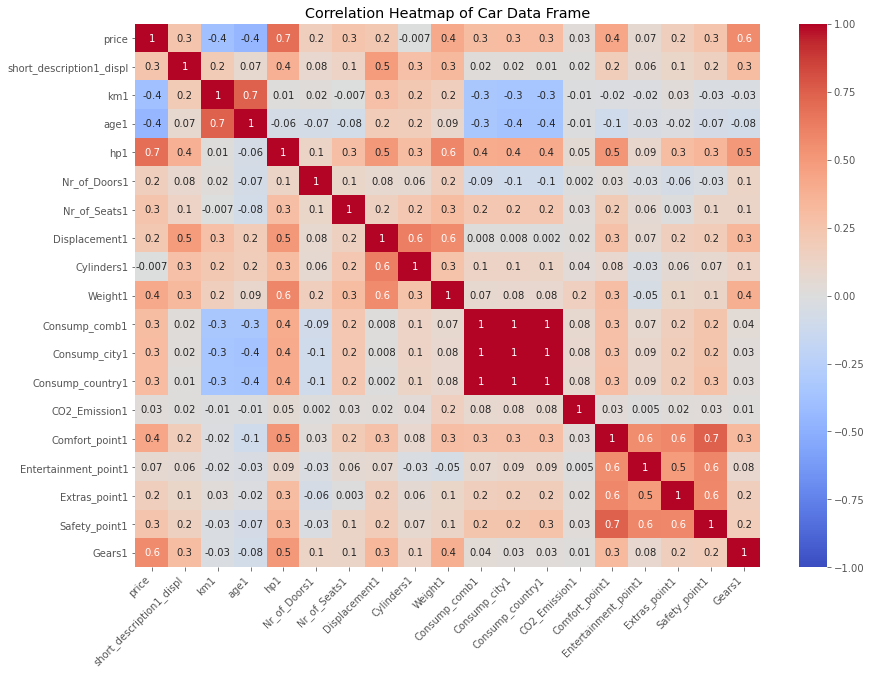

In [144]:
# Correlation Heatmap of Car DataFrame
corr = car.corr()
plt.figure(figsize=(14,10))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap='coolwarm', square=False, annot=True, fmt='.1g')
ax.set_title('Correlation Heatmap of Car Data Frame')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

In [145]:
# Correlation check by model group
car.groupby('model1')['Consump_country1'].corr(car['price'])

model1
A1          0.609865
A2               NaN
A3          0.530749
Astra       0.646773
Clio        0.470838
Corsa       0.578253
Duster           NaN
Espace      0.516279
Insignia    0.533782
Name: Consump_country1, dtype: float64

In [146]:
# Correlation check by model group
car.groupby('model1')['age1'].corr(car['price'])

model1
A1         -0.752629
A2               NaN
A3         -0.627078
Astra      -0.733827
Clio       -0.379447
Corsa      -0.686058
Duster           NaN
Espace     -0.807964
Insignia   -0.846667
Name: age1, dtype: float64

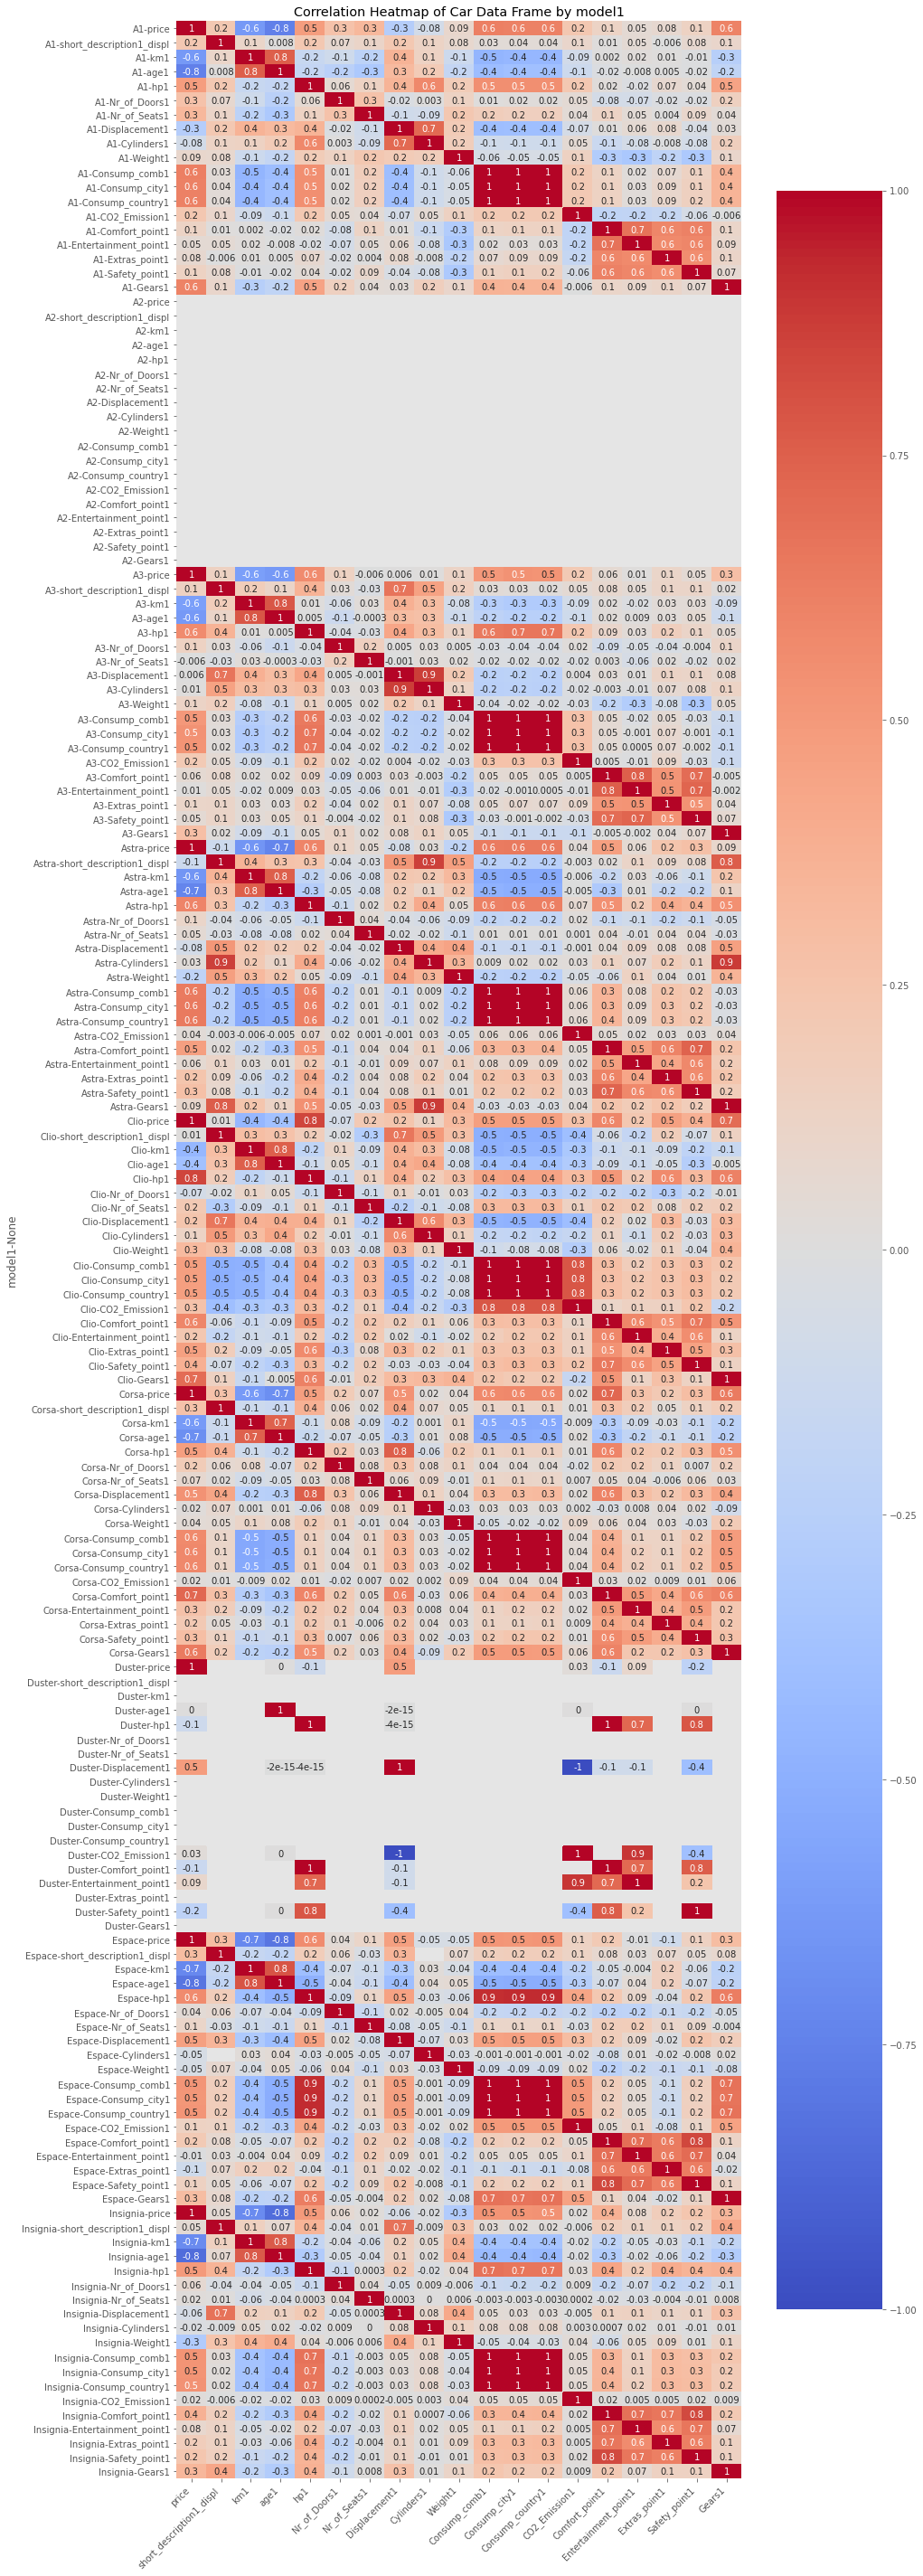

In [147]:
# Correlation Heatmap by model group
corr = car.groupby('model1').corr()
plt.figure(figsize=(14,50))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap='coolwarm', square=False, annot=True, fmt='.1g')
ax.set_title('Correlation Heatmap of Car Data Frame by model1')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

In [148]:
# Correlation check by model1 group
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)
car.groupby('model1').corr('pearson')[['price']]

price
model1                                     
A1       price                     1.000000
         short_description1_displ  0.220167
         km1                      -0.632418
         age1                     -0.752629
         hp1                       0.483881
...                                     ...
Insignia Comfort_point1            0.369403
         Entertainment_point1      0.078344
         Extras_point1             0.177196
         Safety_point1             0.237735
         Gears1                    0.338437

[171 rows x 1 columns]

In [149]:
# Exporting data to csv file for second part of analysis
car.to_csv (r'car_Part1_cleaned.csv', index = False, header=True)